## Problem Statement

> I notice that a lot of times in medicine, there are many possibilities for what medical condition a person could have based on their symptoms, and I feel that there should be more done so that people can appropriately weight the possibility of rarer conditions instead of just relying on a guess based on what condition most commonly causes those symptoms. This can really help people who have rarer conditions by allowing them to consider the possibility of these conditions in the case that they are not satisfied with their current diagnoses or want to look more into these conditions.

> The hope I have is that this will help these people in deciding to take preemptive actions to prevent potentially serious complications from possible conditions they were not aware of, rather than it appearing as a last-minute surprise that they have a serious condition and did not take any action because they were not aware of the possibility (even if it was very narrow) of them having it. Another thing I note is that certain patents rely lots of medicines and treatments for various symptoms that they think of as separate and unrelated (such as issues with cholesterol, blood pressure, immune function, etc.), and I hope that this will help people to consider the possibility of these symptoms stemming from a single or few rare conditions to shift them towards more appropriate treatment.

> I am passionate about this because I have seen various cases people going through a lot of medication and therapy that was not well-suited for the underlying condition they had and suffering a lot as a result. I've also seen plenty of patients with rare conditions such as cancers for which established treatments were not available, so I hope to raise awareness for these conditions thus allowing more effort to be put to develop treatments for them.

> While this has countless applications in the real-world, I will not be able to explore or feasibly find suitable data sets for all of them and as such will focus on a few, including a UCIML repo I found pertaining to heart disease (linked at the bottom of this cell).

> There are various machine learning methods that can help analyze the data I have from my repo, such as classification to use various factors (such as age, gender, weight, height, nutritional factors like cholesterol, fat, and others) to classify whether or not a person can potentially have a specific disease or regression to give a more precise probability of someone having a disease. I can also use clustering to group patients that are similar in these categories and use known conditions from certain patients in these clusters to note possible conditions of other patients in these clusters.

> Some of the challenges include finding data sets that can be analyzed appropriately for some of the rarer conditions, as their rarity may mean there is not enough data available to draw statistically significant results from data analysis (and as such I will not be able to use this model to diagnose all the conditions I might want to account for). Also, because there are so many possible "rare" conditions humans can have, it is going to be very hard to make sure that every possible condition gets enough representation to be able to draw statistically significant results. One more challenge is the fact that, due to the rarity of certain conditions, data preprocessing can very well filter out these conditions if I am not careful. Also, the data sets may not have all the variables that are important to diagnose and/or explain the conditions (for example, the UCIML repository I found does not include information on the immune function of the sampled patients, and this may be important if I am trying to diagnose a heart condition that can be even partially related to immunity). Moreso, if I do not represent common conditions appropriately in the dataset, I can have overfitting where the model assigns greater probabilities to or more frequent classifications of rare conditions than are true in reality. A final challenge I will note, even though I'll probably find a lot more as I work on this project, is the fact that if I try to find multiple datasets in order to gain more data on potential conditions, some dependent variables could be included in certain data sets but not in others and I would have to account for that in training my model.


> I can use this dataset from the UCIML repo that we've used in our class labs: https://archive.ics.uci.edu/dataset/45/heart+disease

## Exploratory Data Analysis

In [ ]:
# Install package to download data sets from UCI ML Repo
!pip3 install -U ucimlrepo --quiet
from ucimlrepo import fetch_ucirepo;

In [ ]:
# Get the data set
heart_disease = fetch_ucirepo(name="Heart Disease")

In [ ]:
# Get raw data in a pandas.DataFrame format
heart_df = heart_disease.data.original
heart_df_original = heart_df
# this is for self use in case I want to revert heart_df to its original state easily while I am making this notebook


In [ ]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'num'];
numerical_cols_original = numerical_cols;
# will use this later in data cleaning; used UCIML repo description to determine numerical columns
categorical_cols_original = heart_df.columns.difference(numerical_cols);
categorical_cols = categorical_cols_original;
# will update categorical_cols once I do encoding

In [ ]:
# Citation
print("Citation:\n", heart_disease.metadata.additional_info.citation)

Citation:
 None


In [ ]:
# More information
print("Check out this data set on the UCI ML Repository for more information:")
print(heart_disease.metadata.repository_url)

Check out this data set on the UCI ML Repository for more information:
https://archive.ics.uci.edu/dataset/45/heart+disease


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("First 5 rows: \n");
print(heart_df.head(5));

print("\nNumber of rows and columns: ")
print(heart_df.shape);

print("\nData type of each column: ");
print(heart_df.dtypes);

print("\nNumber of null values (or not-null values) in each column: ");
print(heart_df.info());

print("\nGeneral statistics of each numerical column (min, max, mean, standard deviation): ");
print(heart_df.describe());

First 5 rows: 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

Number of rows and columns: 
(303, 14)

Data type of each column: 
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

Number of null

> Note that encoding is already done for us as all of the features (even ones designated as categorical on the repo page) as numerical values

In [ ]:
heart_df_original_1 = heart_df.copy(deep=True); # using in case I want to revert heart_df back to here easily without rerunning the whole notebook
# using heart_df = heart_df_original_1 if I already have heart_df_original_1 defined from running this cell before

In [ ]:
# Remove null values, since I feel this won't remove much from the dataset
heart_df = heart_df.dropna();
# 6 rows in total are removed from heart_df

print("First 5 rows now: \n");
print(heart_df.head(5));

print("\nGeneral statistics of each numerical column (min, max, mean, standard deviation) now: \n");
print(heart_df.describe());


First 5 rows now: 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

General statistics of each numerical column (min, max, mean, standard deviation) now: 

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859

> Comparing the general statistics for the data before and after dropping rows with null values, I think it was okay to do so since the general statistics for each column remain around the same

> Based on the feature values that I notice as potential outliers and the mean, STD, Q1 and Q3 values of those features, I am comfortable classifying outliers as those with a z-score less than -3 or greater than +3 as outliers. I know it may not get all the outliers, but at least ones that I can say almost certainly are outliers.

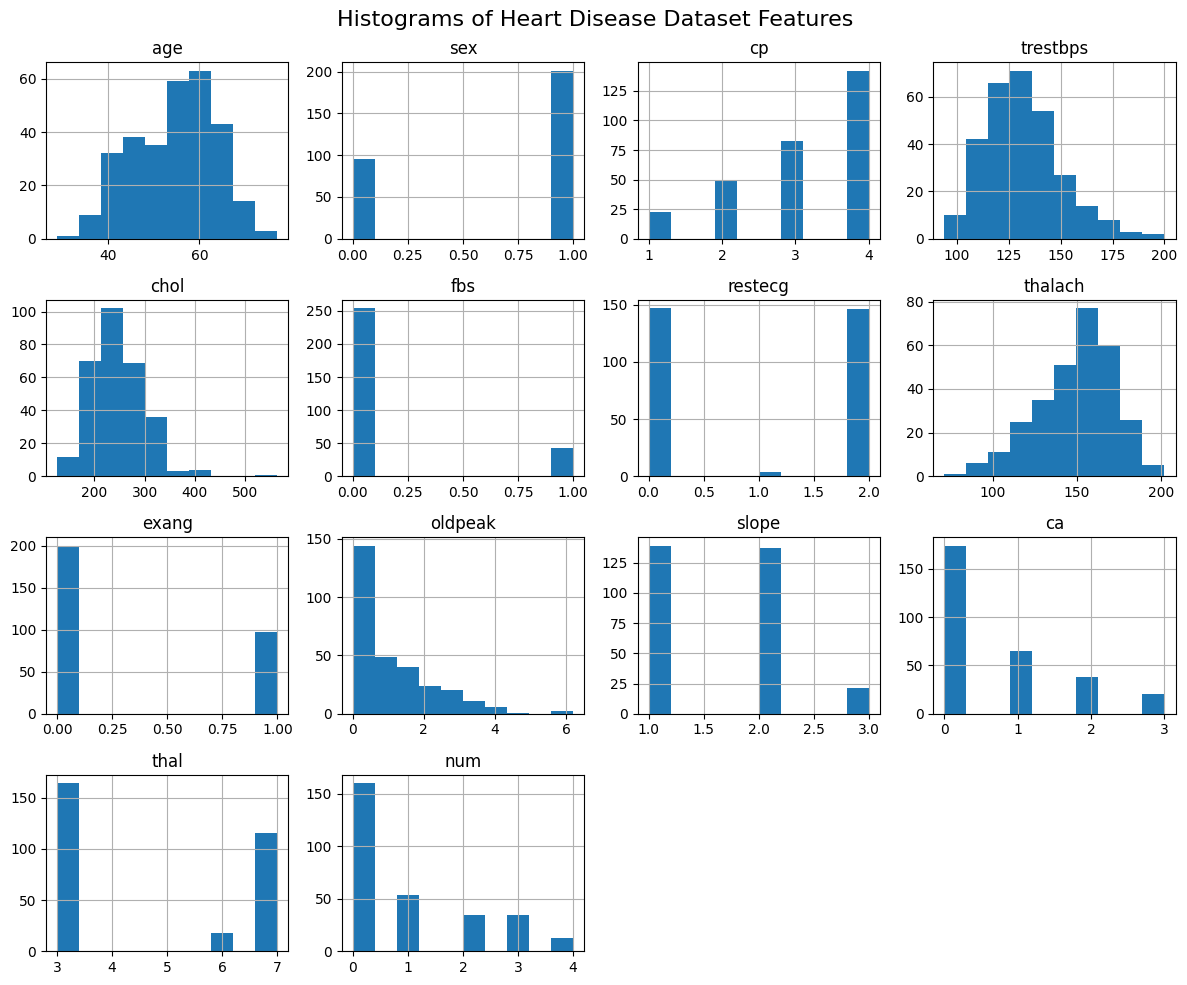

In [ ]:
# preliminary histoplot to see any initial patterns
# Using matplotlib.pyplot for a basic histogram
heart_df.hist(figsize=(12, 10))  # Adjust figsize for better visualization
plt.suptitle('Histograms of Heart Disease Dataset Features', fontsize=16)
plt.tight_layout()  # Prevents overlapping of labels
plt.show()

> I note that the categorical features are already converted to integer representations, though this model doesn't do so well in respecting the fact that these categorical feature values are discrete, potentially giving us values of num that don't correspond to any of the conditions we have data for and thus not statistically reliable predictions. I will first modify the numerical data of heart_df before creating a separate dataframe with encoded columns.

> I also note that num=4 has very few entries to the point the data might not be representative enough of num==4 to have any use in classifying it

In [ ]:
print(len(heart_df[heart_df['num'] == 4]))
# ok 13/297 is not too low so I will keep it

13


In [ ]:
# based on the extremely low frequency of restecg == 1, I suspect those might have been typos
# I can also see thal=6 maybe being a typo since 6 is immediately above 3 on a 3x3 numerical keyboard
# and the person typing the dataset could have made frequent typos on that for some reason

# ca and restecg are not like the other variables with a few discrete variables that are
# labeled as categorical in the data, so I want to get the counts for restecg==1 and thal==6
num_rows_restecg1 = len(heart_df[heart_df['restecg'] == 1]);
print(f"Number of rows where restecg == 1: {num_rows_restecg1}");
num_rows_thal6 = len(heart_df[heart_df['thal'] == 6]);
print(f"Number of rows where thal == 6: {num_rows_thal6}");

Number of rows where restecg == 1: 4
Number of rows where thal == 6: 18


> From here, since the number of rows with restecg==1 is suspiciously low, we can suspect that that is either a rare value for the feature or a typo

> On the other hand, number of rows with thal==6 isn't low enough for me to suspect anything

In [ ]:
heart_df_original_2 = heart_df.copy(deep=True); # using this in case I want to revert heart_df back to here easily without rerunning the whole notebook
# using heart_df = heart_df_original_2 if I already have heart_df_original_2 defined from running this cell before

In [ ]:
# removing outliers using z-score values
from sklearn.preprocessing import StandardScaler;

len_difference = -1;

while (len_difference != 0):
  '''
  loop until no more outliers are removed from z-score standardization
  since I found that removing outliers in one iteration can have significant leave samples
  that should be classified as outliers with this method in the modified data set
  '''
  len_original = len(heart_df);
  scaler = StandardScaler();
  scaled_data = scaler.fit_transform(heart_df[numerical_cols]);

  heart_df_z = pd.DataFrame(scaled_data, columns=numerical_cols, index=heart_df.index);

  outlier_indexes = [];
  for col in numerical_cols:
      outlier_indexes.extend(heart_df.index[heart_df_z[col].abs() > 3]);

  heart_df = heart_df[~heart_df.index.isin(outlier_indexes)];
  len_difference = len_original - len(heart_df);

print(f"Total number of rows filtered out using Z-score standardization: {len(heart_df_original_2) - len(heart_df)}");
# remember that heart_df_2 is the version of heart_df before removing any of these outliers

Total number of rows filtered out using Z-score standardization: 13


In [ ]:
heart_df_original_3 = heart_df.copy(deep=True)

In [ ]:
print("First 5 rows now: \n");
print(heart_df.head(5));

print("\nGeneral statistics of each numerical column (min, max, mean, standard deviation) now: \n");
print(heart_df.describe());

First 5 rows now: 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

General statistics of each numerical column (min, max, mean, standard deviation) now: 

              age         sex          cp    trestbps        chol         fbs  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean    54.309859    0.686620    3.144366  130.950704  243.651408    0.144366   
std      9.127045    0.464686    0.964165

> I am happy with the data statistics now, since they don't show any data with a z-score greater than 3 or less than -3. I also note that most of the statistics have not changed much, even if a few (such as mean and especially std for chol) may have had significant changes due to the presence of outliers in the original data.

> I note that the number of rows has significantly changed, as well as: std of chol, mean and std of oldpeak, and mean of num; and (not as significantly) std of trestbps and mean of chol, mean and std of slope, mean and std of ca, and std of num

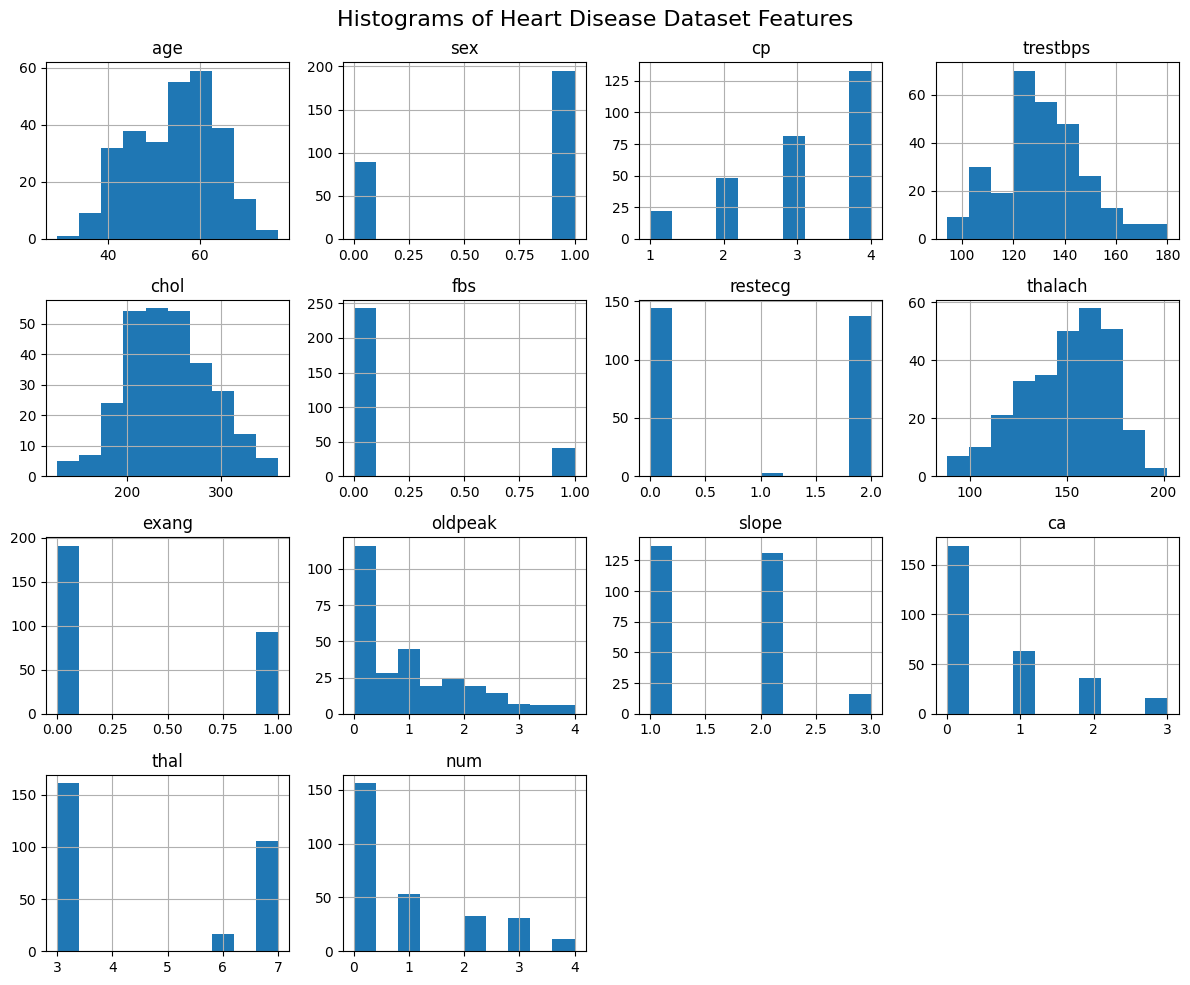

In [ ]:
# histoplot after removing outliers
heart_df.hist(figsize=(12, 10))  # Adjust figsize for better visualization
plt.suptitle('Histograms of Heart Disease Dataset Features', fontsize=16)
plt.tight_layout()  # Prevents overlapping of labels
plt.show()

"\nthe diag_kind = 'kde' specifies that the diagonal plots should be kernel density estimation (KDE) plots\nto visualize the probability density of the data for each numerical feature using a kernel function\nThis is used for better visualization of the individual feature distributions that might otherwise be hidden by histograms\nand to allow for easier comparison of the distributions of the different features\n"

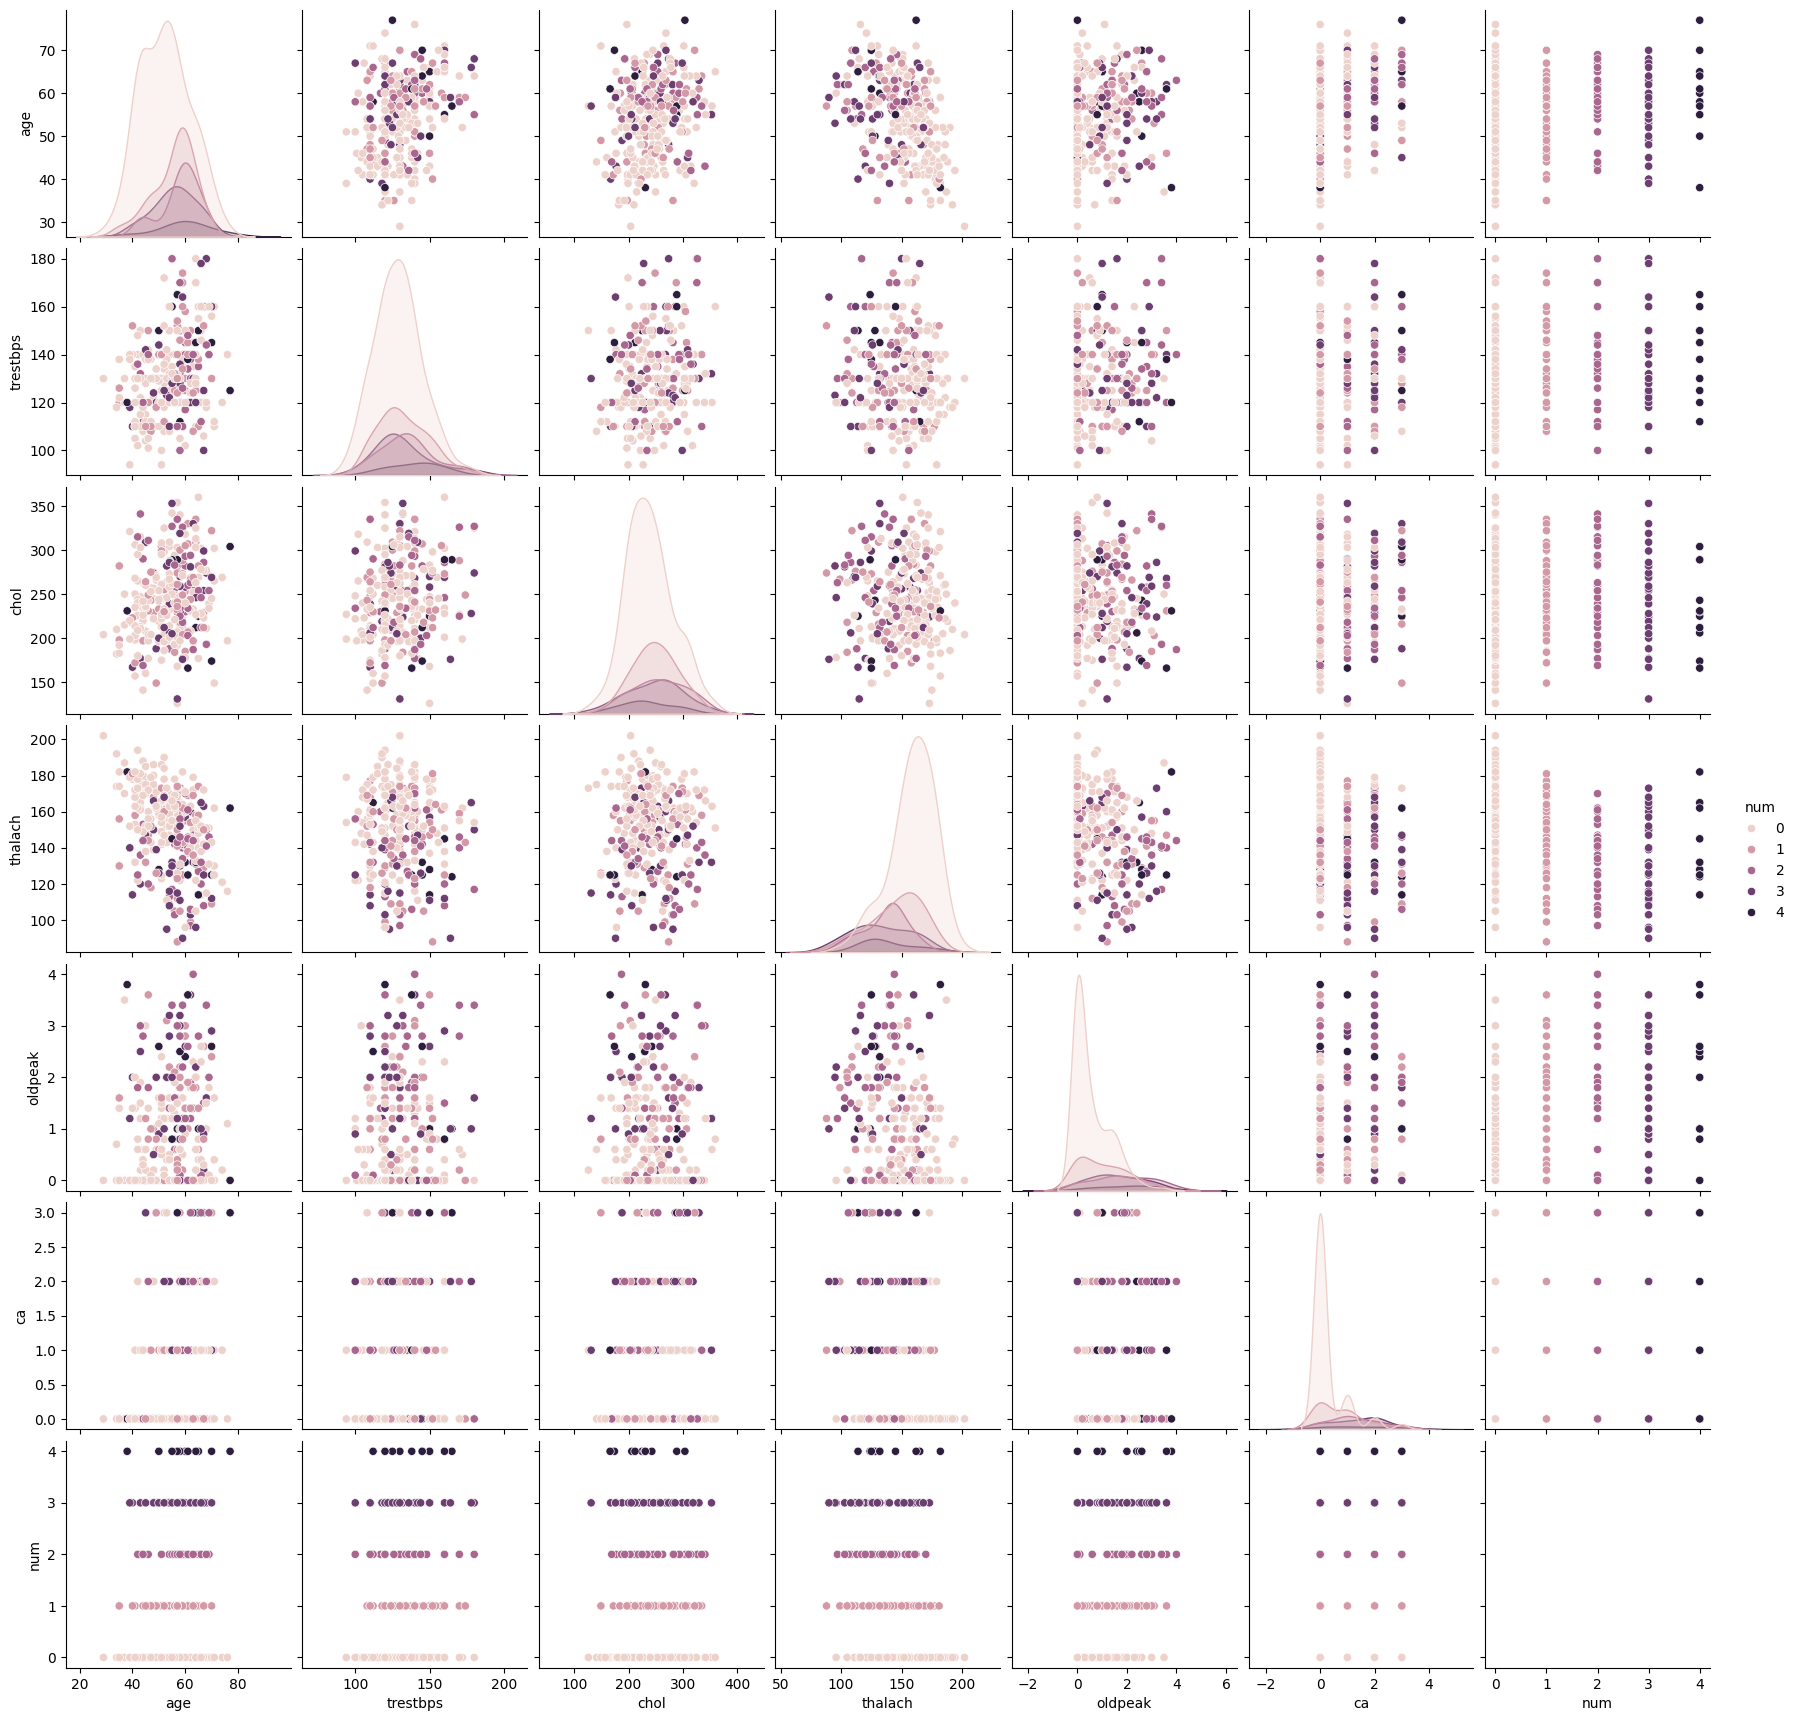

In [ ]:
# Plotting numerical features vs all other numerical features to see potential relationships between them
# noting that plotting categorical features vs categorical features will make lots
# of points overlap each other thus not showing much info; this way I save a lot of computational resources
sns.pairplot(heart_df, x_vars = numerical_cols, y_vars = numerical_cols, hue='num', diag_kind='kde');
'''
the diag_kind = 'kde' specifies that the diagonal plots should be kernel density estimation (KDE) plots
to visualize the probability density of the data for each numerical feature using a kernel function
This is used for better visualization of the individual feature distributions that might otherwise be hidden by histograms
and to allow for easier comparison of the distributions of the different features
'''

> Now to create the dataframe with encoded values for the discrete integer values corresponding to categorical features so I can see any relationships from that. Also, I checked and I note that none of the categorical feature values were removed in our outlier detection steps

In [ ]:
# Creating the dataframe heart_df_v2 with encoded columns for categorical features
heart_df_v2 = pd.get_dummies(heart_df, columns=categorical_cols);
numerical_cols_v2 = numerical_cols;
categorical_cols_v2 = heart_df_v2.columns.difference(numerical_cols_v2);
# storing the numerical and categorical columns of heart_df_v2

In [ ]:
# Showing structure of heart_df_v2
print("First 5 rows: \n");
print(heart_df_v2.head(5));

print("\nNumber of rows and columns: ")
print(heart_df_v2.shape);

print("\nData type of each column: ");
print(heart_df_v2.dtypes);

print("\nNumber of null values (or not-null values) in each column: ");
print(heart_df_v2.info());

print("\nGeneral statistics of each numerical column (min, max, mean, standard deviation): ");
print(heart_df_v2.describe());

First 5 rows: 

   age  trestbps  chol  thalach  oldpeak   ca  num   cp_1   cp_2   cp_3  ...  \
0   63       145   233      150      2.3  0.0    0   True  False  False  ...   
1   67       160   286      108      1.5  3.0    2  False  False  False  ...   
2   67       120   229      129      2.6  2.0    1  False  False  False  ...   
3   37       130   250      187      3.5  0.0    0  False  False   True  ...   
4   41       130   204      172      1.4  0.0    0  False   True  False  ...   

   restecg_1  restecg_2  sex_0  sex_1  slope_1  slope_2  slope_3  thal_3.0  \
0      False       True  False   True    False    False     True     False   
1      False       True  False   True    False     True    False      True   
2      False       True  False   True    False     True    False     False   
3      False      False  False   True    False    False     True      True   
4      False       True   True  False     True    False    False      True   

   thal_6.0  thal_7.0  
0      Tru

> No numerical columns modified from heart_df so no use for histogram or pairplot visualization (since again, plotting categorical vs numerical columns will just lead to tons of overlap)

> From the last pairplot, since ca and num take on discrete values in a relatively short range and (even though they are listed as integers in the repository) and seem to describe categories, I will now create a new dataframe with ca and num encoded as well to see more relationships. I also note that ca and num are not useful as numerical values since any classifications made using data with values of ca or num not seen in the training data won't be statistically significant since we haven't trained the model on any data with these unseen values for ca or num

In [ ]:
adjusted_cols = ['ca', 'num']
numerical_cols_v3 = list(set(numerical_cols_original).difference(adjusted_cols));
# makes numerical_cols_v3 as a list of the original numerical columns except not containing 'ca' and 'num'
categorical_cols_v3 = list(categorical_cols_original) + adjusted_cols;
# categorical_cols_v3 now contains 'ca' and 'num' for encoding

heart_df_v3 = pd.get_dummies(heart_df, columns=categorical_cols_v3);

In [ ]:
# Showing structure of heart_df_v3
print("First 5 rows: \n");
print(heart_df_v3.head(5));

print("\nNumber of rows and columns: ")
print(heart_df_v3.shape);

print("\nData type of each column: ");
print(heart_df_v3.dtypes);

print("\nNumber of null values (or not-null values) in each column: ");
print(heart_df_v3.info());

print("\nGeneral statistics of each numerical column (min, max, mean, standard deviation): ");
print(heart_df_v3.describe());

First 5 rows: 

   age  trestbps  chol  thalach  oldpeak   cp_1   cp_2   cp_3   cp_4  exang_0  \
0   63       145   233      150      2.3   True  False  False  False     True   
1   67       160   286      108      1.5  False  False  False   True    False   
2   67       120   229      129      2.6  False  False  False   True    False   
3   37       130   250      187      3.5  False  False   True  False     True   
4   41       130   204      172      1.4  False   True  False  False     True   

   ...  thal_7.0  ca_0.0  ca_1.0  ca_2.0  ca_3.0  num_0  num_1  num_2  num_3  \
0  ...     False    True   False   False   False   True  False  False  False   
1  ...     False   False   False   False    True  False  False   True  False   
2  ...      True   False   False    True   False  False   True  False  False   
3  ...     False    True   False   False   False   True  False  False  False   
4  ...     False    True   False   False   False   True  False  False  False   

   num_4  
0  Fa

In [ ]:
categorical_num_cols = ['num_0', 'num_1', 'num_2', 'num_3', 'num_4']
# represents the categorical columns corresponding to encoding num

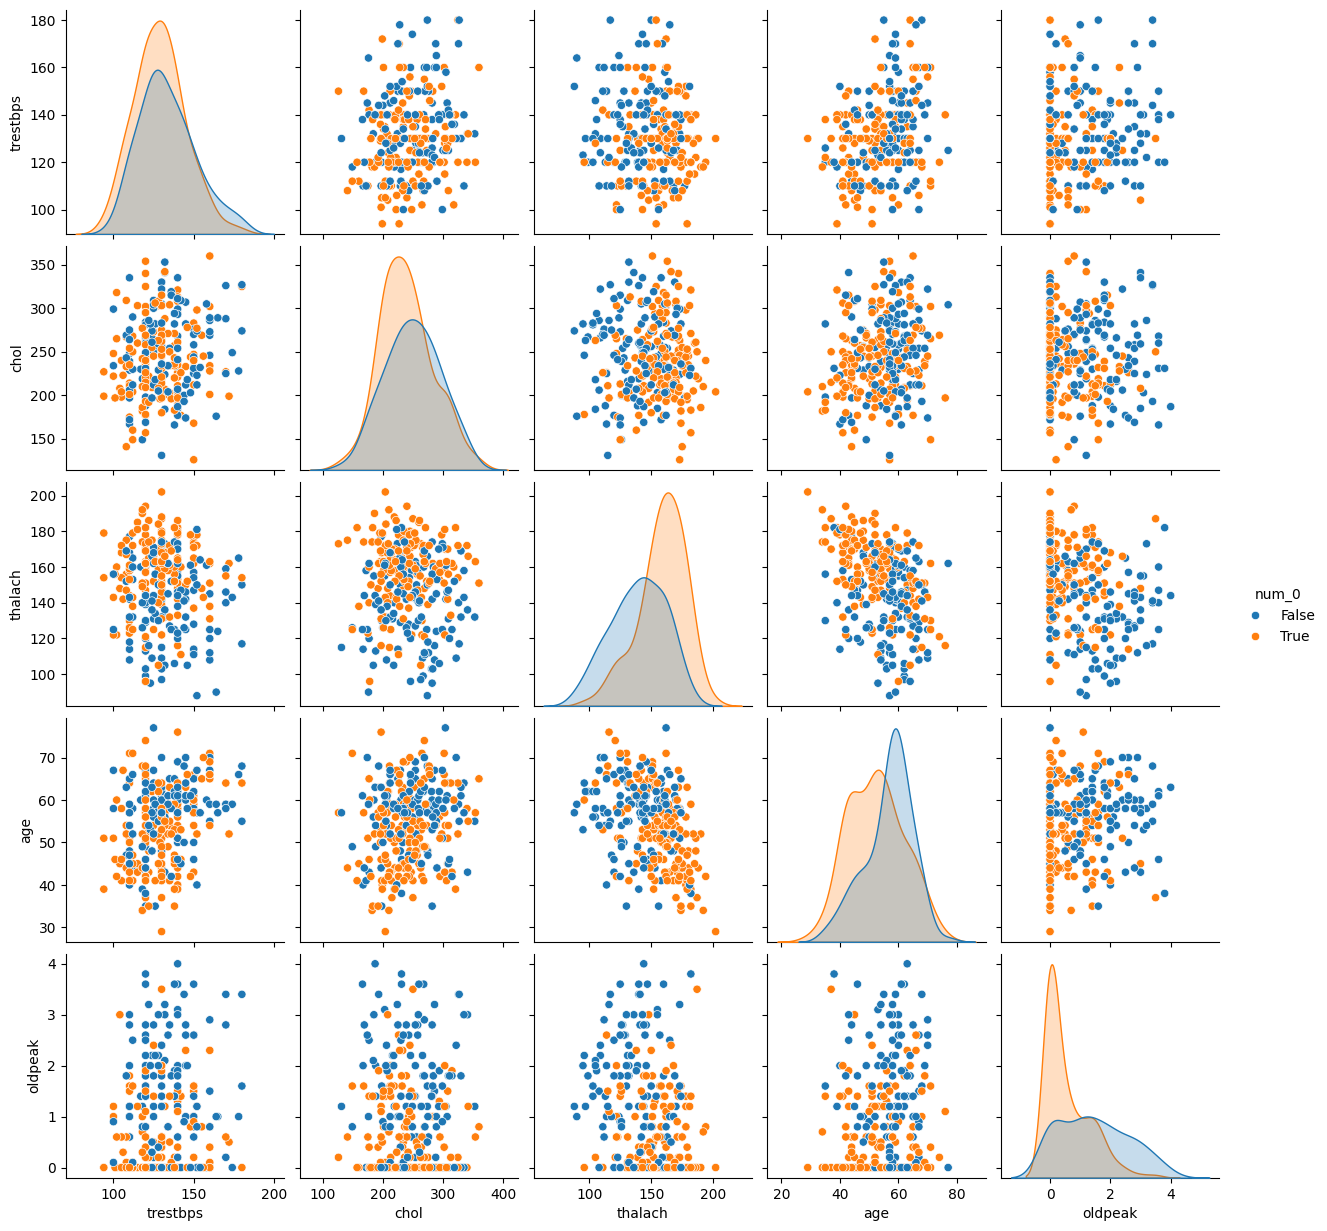

In [ ]:
# Again skipping histogram because no numerical columns have changed values
# So onto pairplot starting with hue=num_0
sns.pairplot(heart_df_v3, x_vars = numerical_cols_v3, y_vars = numerical_cols_v3, hue='num_0', diag_kind='kde');

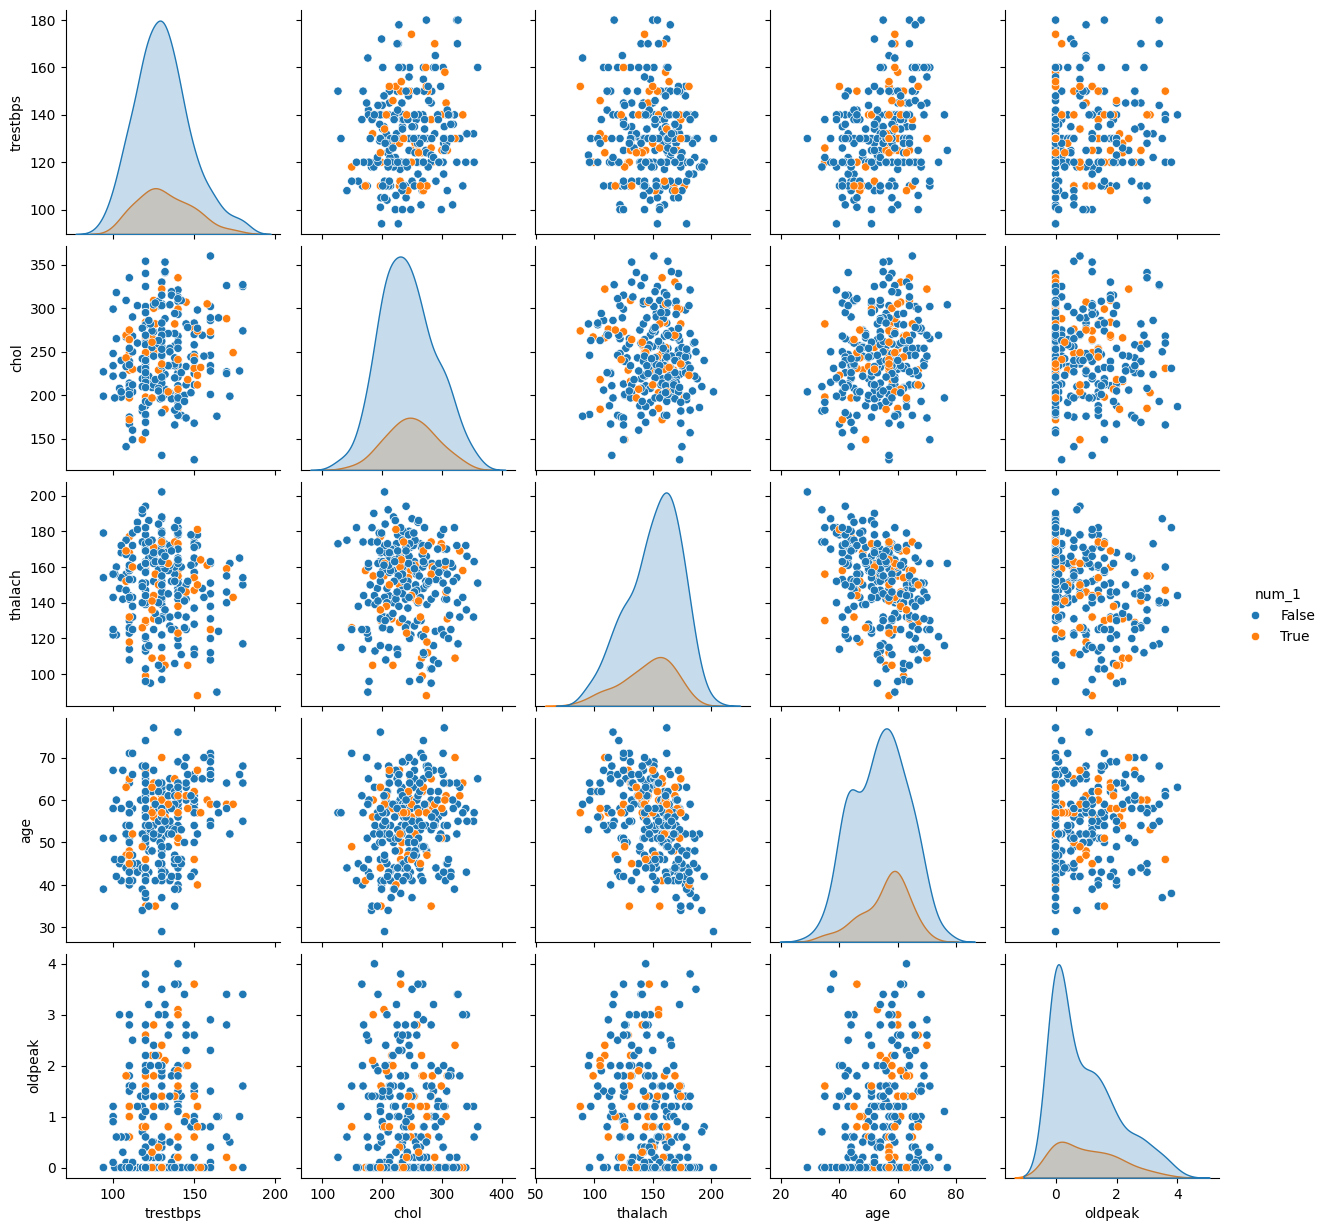

In [ ]:
# Now onto pairplot with hue=num_1
sns.pairplot(heart_df_v3, x_vars = numerical_cols_v3, y_vars = numerical_cols_v3, hue='num_1', diag_kind='kde');

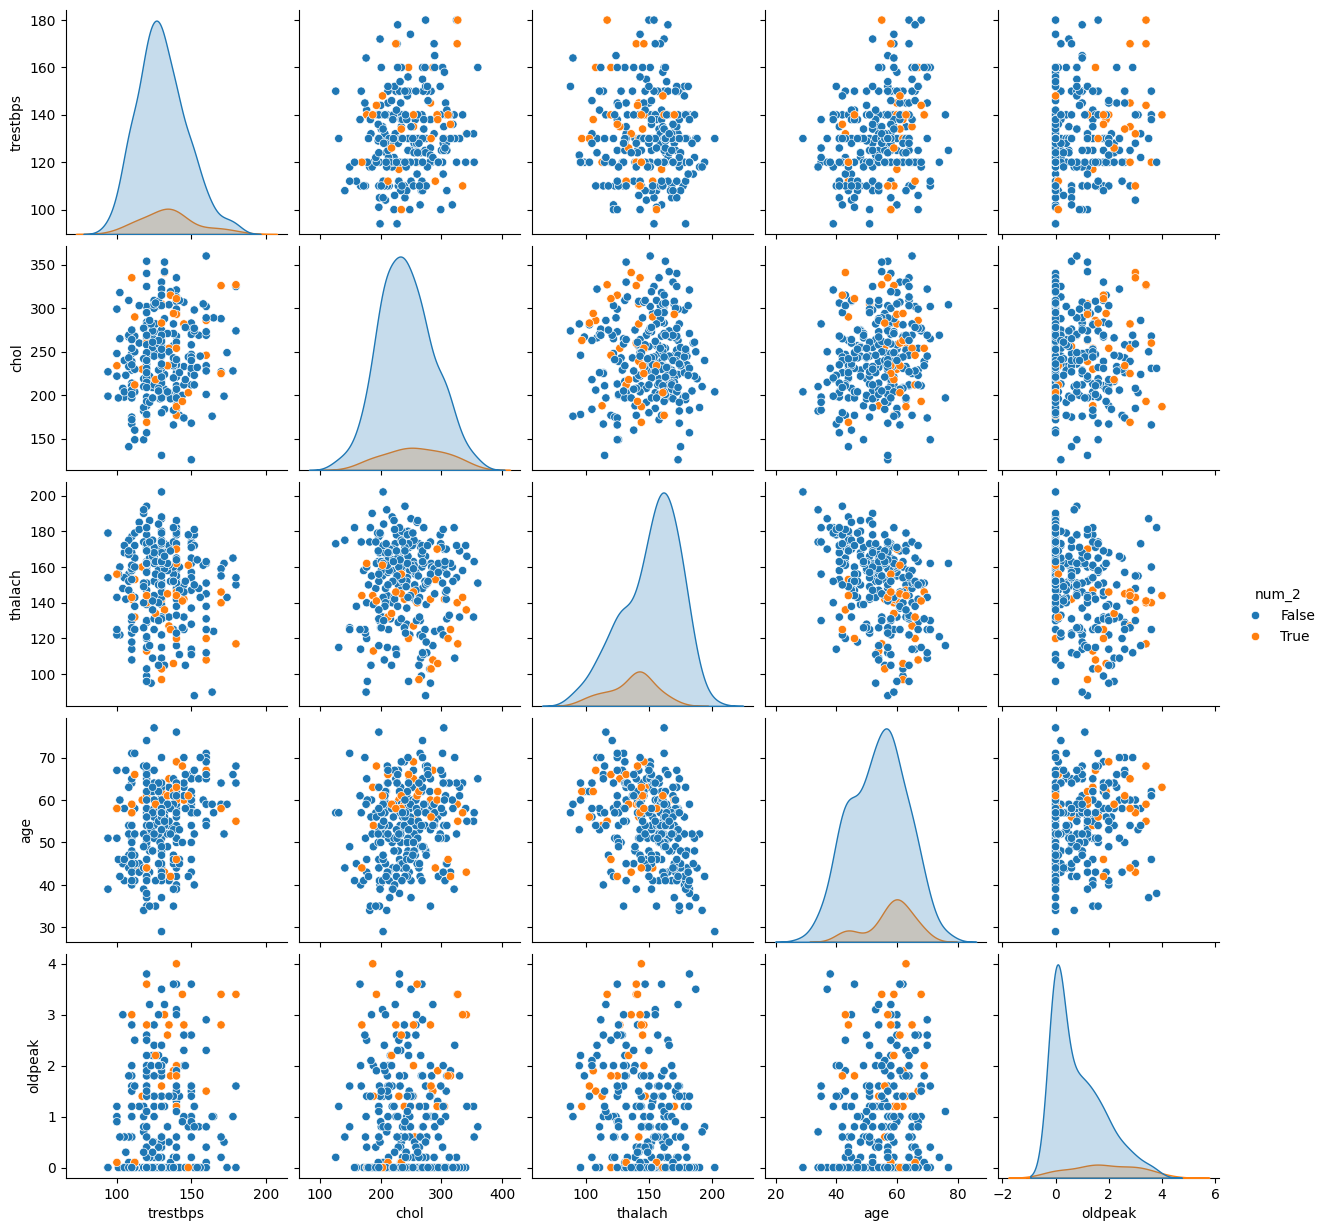

In [ ]:
# Now onto pairplot with hue=num_2
sns.pairplot(heart_df_v3, x_vars = numerical_cols_v3, y_vars = numerical_cols_v3, hue='num_2', diag_kind='kde');

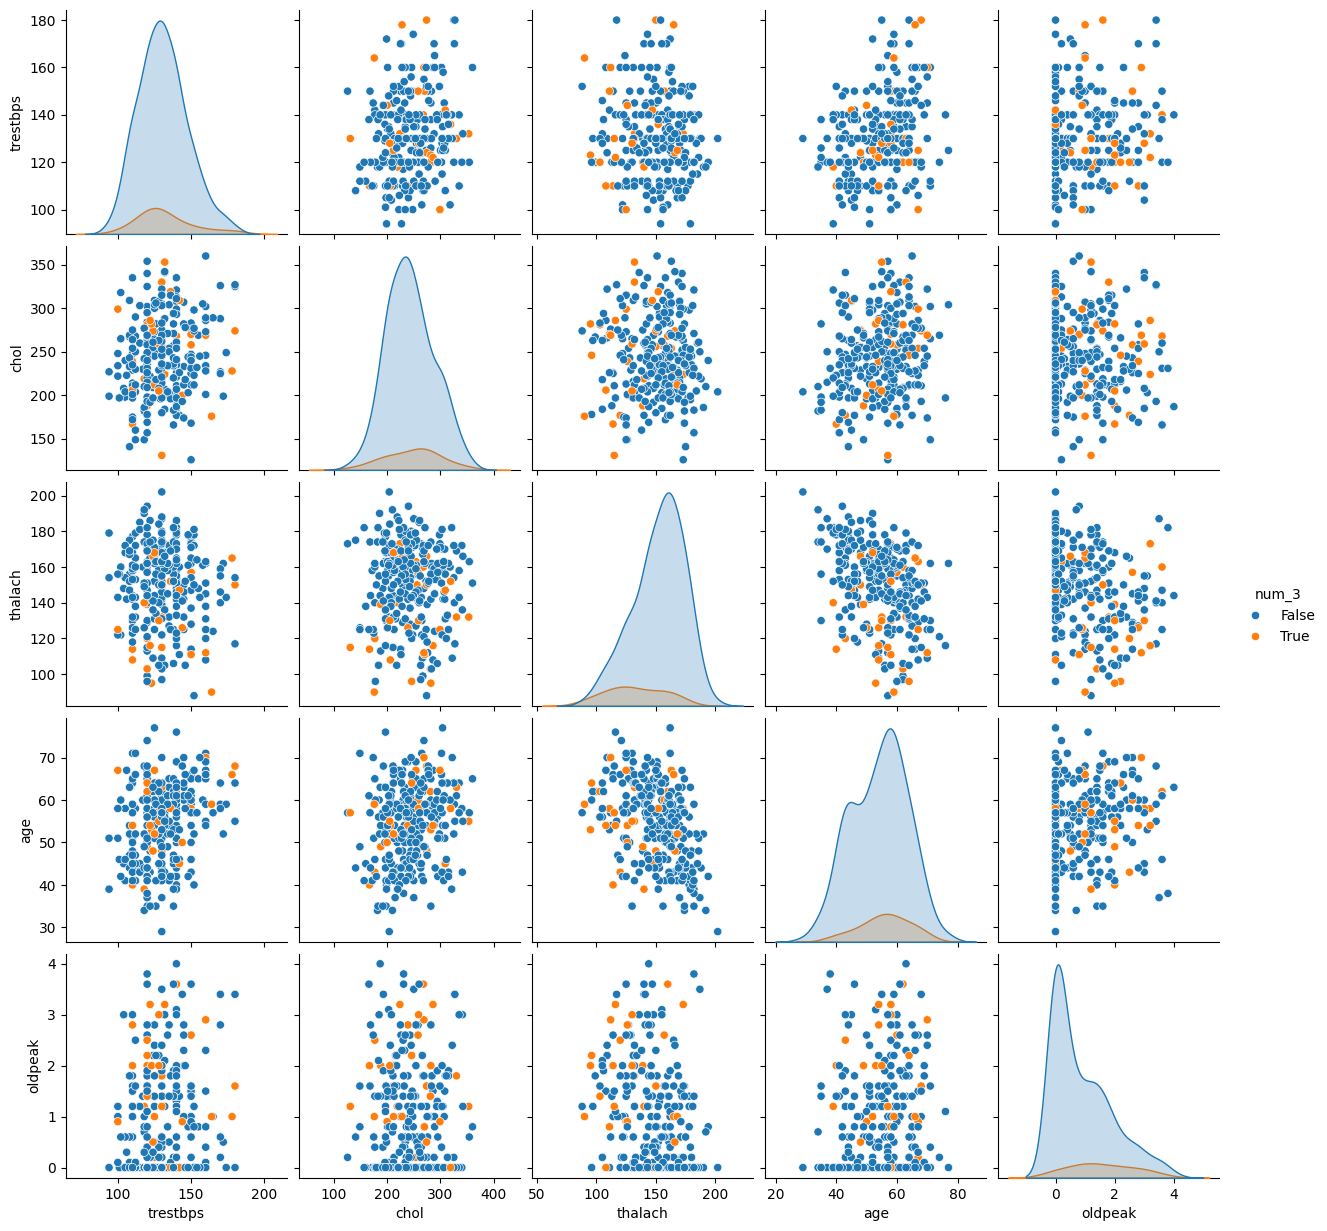

In [ ]:
# Now onto pairplot with hue=num_3
sns.pairplot(heart_df_v3, x_vars = numerical_cols_v3, y_vars = numerical_cols_v3, hue='num_3', diag_kind='kde');

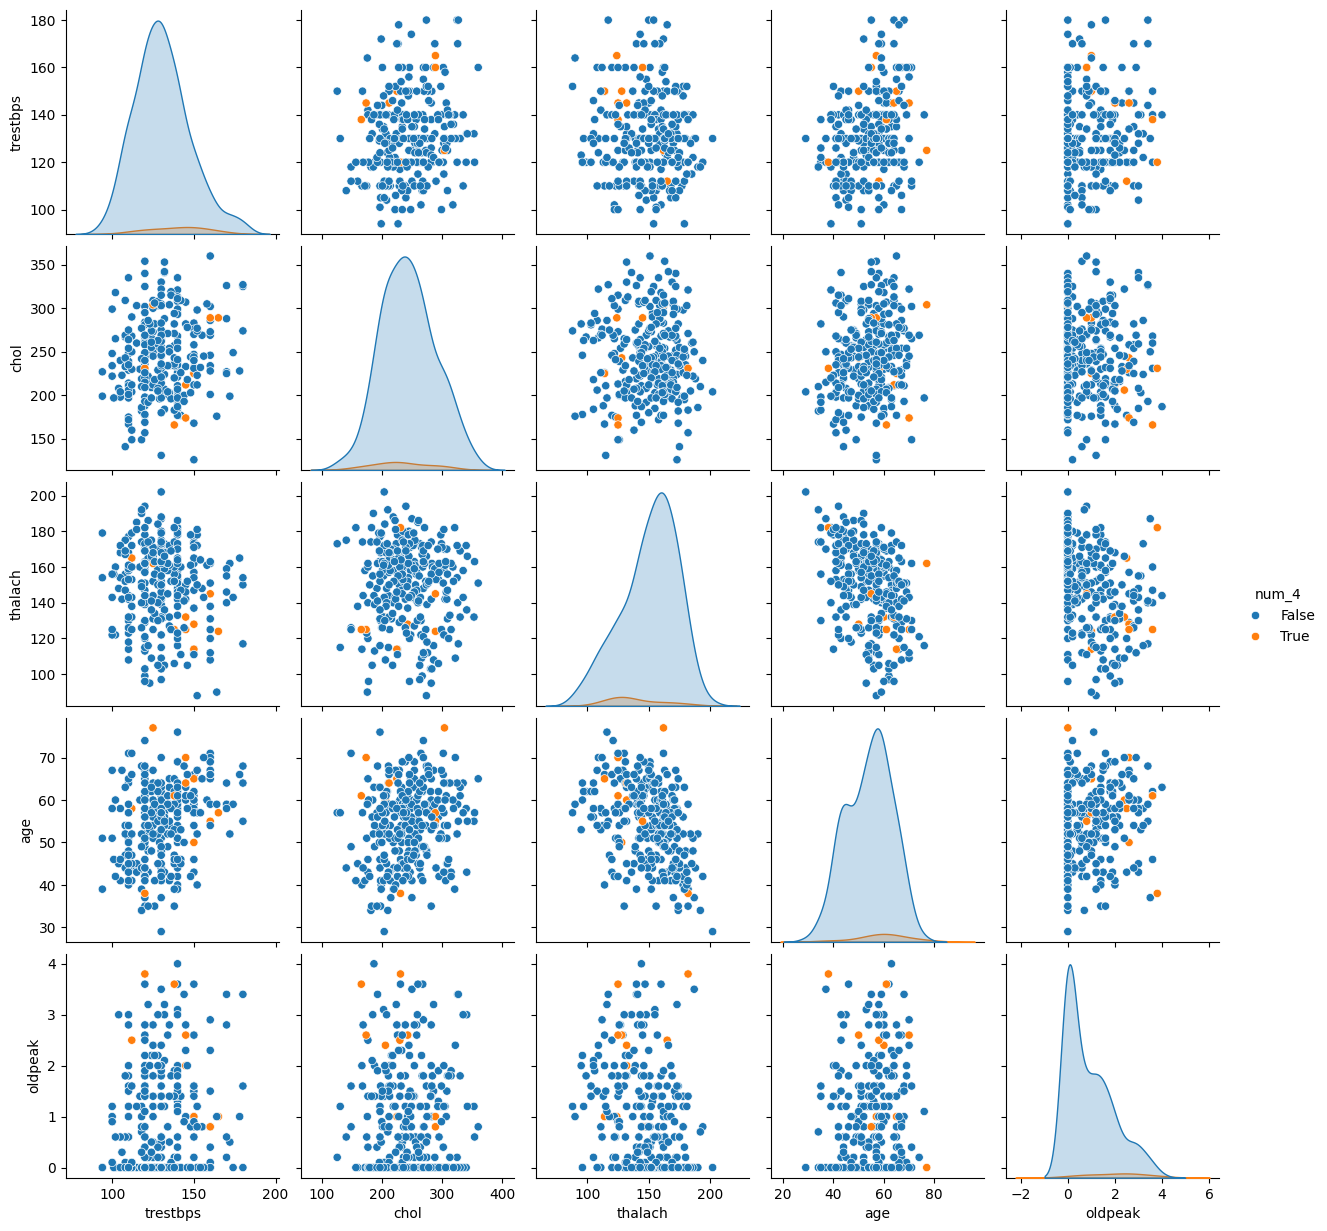

In [ ]:
# Now onto pairplot with hue=num_4
sns.pairplot(heart_df_v3, x_vars = numerical_cols_v3, y_vars = numerical_cols_v3, hue='num_4', diag_kind='kde');

In [ ]:
# Showing number of features for each categorical feature value vs num (ex: number of rows where )
frequency_matrix = pd.crosstab(heart_df['cp'], heart_df['num']);
print(frequency_matrix, "\n");
frequency_matrix = pd.crosstab(heart_df['exang'], heart_df['num']);
print(frequency_matrix, "\n");
frequency_matrix = pd.crosstab(heart_df['fbs'], heart_df['num']);
print(frequency_matrix, "\n");
frequency_matrix = pd.crosstab(heart_df['sex'], heart_df['num']);
print(frequency_matrix, "\n");
frequency_matrix = pd.crosstab(heart_df['slope'], heart_df['num']);
print(frequency_matrix, "\n");
frequency_matrix = pd.crosstab(heart_df['thal'], heart_df['num']);
print(frequency_matrix, "\n");
frequency_matrix = pd.crosstab(heart_df['ca'], heart_df['num']);
print(frequency_matrix, "\n");


num   0   1   2   3  4
cp                    
1    15   5   1   0  1
2    40   5   1   2  0
3    63   9   4   4  1
4    38  34  27  25  9 

num      0   1   2   3  4
exang                    
0      133  29  13  11  5
1       23  24  20  20  6 

num    0   1   2   3   4
fbs                     
0    134  50  25  24  10
1     22   3   8   7   1 

num   0   1   2   3   4
sex                    
0    68   9   6   5   1
1    88  44  27  26  10 

num      0   1   2   3  4
slope                    
1      102  21   7   6  1
2       46  30  23  23  9
3        8   2   3   2  1 

num     0   1   2   3  4
thal                    
3.0   125  22   6   6  2
6.0     6   3   6   1  1
7.0    25  28  21  24  8 

num    0   1   2   3  4
ca                     
0.0  126  26   7   7  3
1.0   20  18  14   8  3
2.0    7   6   8  13  2
3.0    3   3   4   3  3 



> I do notice that num_4 only has 11 entries now versus the count of num==4 being 13 earlier but I still think it's not low enough to drop num == 4

# Summary of EDA

## Steps

> Removed rows with any missing values, which only decreased the number of rows by 6 from an original row count of 303, and this didn't have a significant impact on any of the statistics for any of the columns

> Removed outliers through the removal of rows with a z-score less than -3 or greater than 3 for any feature value

> Then encoded the categorical values of heart_df in the dataframe heart_df_v2 and pairplotted it with hue='num'

> I noted from that pairplot that data points with different classifications of num overlapped a lot leading to no easily-discernable relationships. I noted earlier that ca essentially behaved like a categorical variable and so did num, so I created a dataframe heart_df_v3 with num and ca encoded so as to visualize that data without modifying the original data and without the overlapping present in the heart_df_v2 pairplot, believing that this would help me further distinguish relationships between feature values and different values of ca and num.

> Finally, I created frequency matrices for each value of the categorical variables (including ca but not num) versus each value of num to get specific counts on how many samples of each corresponding categorical feature value corresponded to each value of num

## Findings

> Note that cp=1 has no corresponding values to ca=3 or restecg=1 (the restecg is expected since there are very few samples with restecg=1)

> ** Based on heart_df_v2 pairplot and heart_df_v3 pairplots where samples with many distinct values of num were clustered together, I note that k-means clustering will likely not work to classify the value of num **

> From frequency table, generally much higher frequency for fbs==0, sex==1 for all num values

> Noted from heart_df_v2 pairplot and heart_df_v3 / hue='num_0' pairplot that people with num=0 generally had a wider variety of values for all numerical features. Noted from frequency table that num==0 usually had much higher proportion cp==3 (versus other groups), exang==0, slope==1, thal==3.0, ca==0.0, and much lower frequency of sex==1 than other num values (ca==0.0 was at a much higher proportion for num==0 than num==1 through 4)

> CP: much higher proportion of cp==3 for num==0, for rest of num values much higher frequency of cp==4 than num==0

> Exang: around equal frequency for exang==0 and exang==1, but much higher frequency of exang==0 for num==0

> fbs: much higher frequency for all num values for fbs==0 versus fbs==1 but the crown goes to num==1

> sex: generally much higher sex==1 but not as high proportion for num==0 as for other num values

> slope: much higher proportion of slope==2 for num==2 through 4 than num==0 through 1, and much higher proportion of slope==1 for num==0 than others; much lower proportion of slope==3 for all num values than for other slope values

> thal: generally thal==3.0 or 7.0 for all num values but much higher proportion of thal==3.0 for num==0 than for other num values

> ca: much higher frequency of ca==0.0 for num==0 versus other values; num==0 and num==1 had much lower frequencies of ca==2.0 or ca==3.0 than other num values

> Also noted from the heart_df_v3 / hue='num_0' pairplot that most of the samples with num=0 had slightly lower values for trestbps and significantly lower values for oldpeak but had somewhat significantly higher values for thalach;
> Noticeably more samples with cp==2 or cp==3 were from num==0 (confirmed by frequency matrix for cp vs num)

> Now onto the findings (for the numerical variables not including num) from the pairplots:

> For num=0: noticeably higher thalach, slightly lower trestbps, noticeably lower oldpeak and plenty of the lower values for trestbps and age correspond to num==0

> For num==1, noticeably lower thalach and maybe lower oldpeak compared to other groups

> For num==2, slightly higher oldpeak compared to average of other groups (a lot of the high oldpeak values lie in num==2) and same with trestbps, chol, and thalach

> For num==3, noticeably lower thalach, trestbps, and slightly higher oldpeak

> For num==4, noticeably higher oldpeak, somewhat noticeably lower chol and thalach, maybe a little higher trestbps and age


> * Wider range of values of various features corresponding to fbs=0 versus fbs=1

## Interpreting the results


> I note that I think num==0 means no heart disease since it makes up the majority of samples and has significant differences in feature values from the rest of the num values (which I think do correspond to heart diseases)

> The much higher frequency for ca==0.0 for num==0 makes me think that ca != 0 has a big role to play in most if not all heart conditions (causing or being caused by it). The results for thal make me think that thal==3.0 generally in a non-heart condition person and that the change of thal from 3.0 can play a role in heart disease. The higher proportion of sex==1 corresponding to being positive for any heart condition corresponding to num==1 through 4 makes me think that one sex (corresponding to sex==1) is much more vulnerable to heart conditions than the other. Looking it up, men are slightly more likely to develop heart disease at a younger age than women, but lifetime disease risk for both sexes is similar, so the much higher proportion of heart disease in one sex versus the other might be heavily biased by the disease corresponding to num=1 through 4 that were checked for. The fbs findings indicate that fbs might not play a role in all heart disease, but may for some such as the one corresponding to num==1. The exang findings indicate that exang==0 is common among most people but that shifting to exang==1 may be a slight indicator of a potential heart condition. The cp findings may indicate that cp != 0 is a significant risk factor for developing / having heart disease.

> The num==0 findings from the pairplot with hue=='num_0' indicate that higher thalach and lower oldpeak leads to less risk for heart disease, and that most people with low trestbps and age fall into the category of num==0. The num==1 findings from the pairplot with hue=='num_1' indicate that lower thalach can lead to / stem from this heart disease, and maybe lower oldpeak as well. The num==2 findings from the pairplot with hue=='num_2' indicate that having high values for all the numerical features can play a significant role in causing or can stem from the num_2 heart condition. The num==3 findings indicate that this heart condition can be caused by or cause noticeably lower thalach and trestbps and maybe higher oldpeak. The num==4 findings indicate that this heart condition can cause or stem from higher oldpeak and maybe from higher trestbps, age, and lower chol and thalach.

> I know that was a lot, but from these findings, ** I definitely want to look at ca, sex, and cp, and I want to look at least a little at thal, fbs and exang. **

# Model Selection

> Because this data doesn't seem separable in 2D or 3D based on any of the features, one thing I might want to try is PCA. For simplicity, I will first try using heart_df first to see how good the predictions are

> From my EDA findings, clustering won't work well for this (since clustering doesn't really work well for any feature), and because the data is clearly not linearly separable, linear regression won't work well either. Maybe I can try these after doing PCA though.

In [ ]:
# This is here so that we can restore heart_df to its original state should it accidentally be modified
heart_df = heart_df_original_3.copy(deep=True)

In [ ]:
# Using PCA
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

heart_df_scaled = heart_df.copy(deep=True);
# want heart_df_scaled to be a scaled version of heart_df
# to use for PCA without modifying heart_df

# will start by scaling numerical features (except num) first
scaler = StandardScaler()
scaled_data = scaler.fit_transform(heart_df_scaled[numerical_cols_original]);

heart_df_scaled[numerical_cols_original] = pd.DataFrame(scaled_data, columns=numerical_cols_original, index=heart_df_scaled.index);

In [ ]:
# Will use this to store the 5 PCA columns
pca_cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

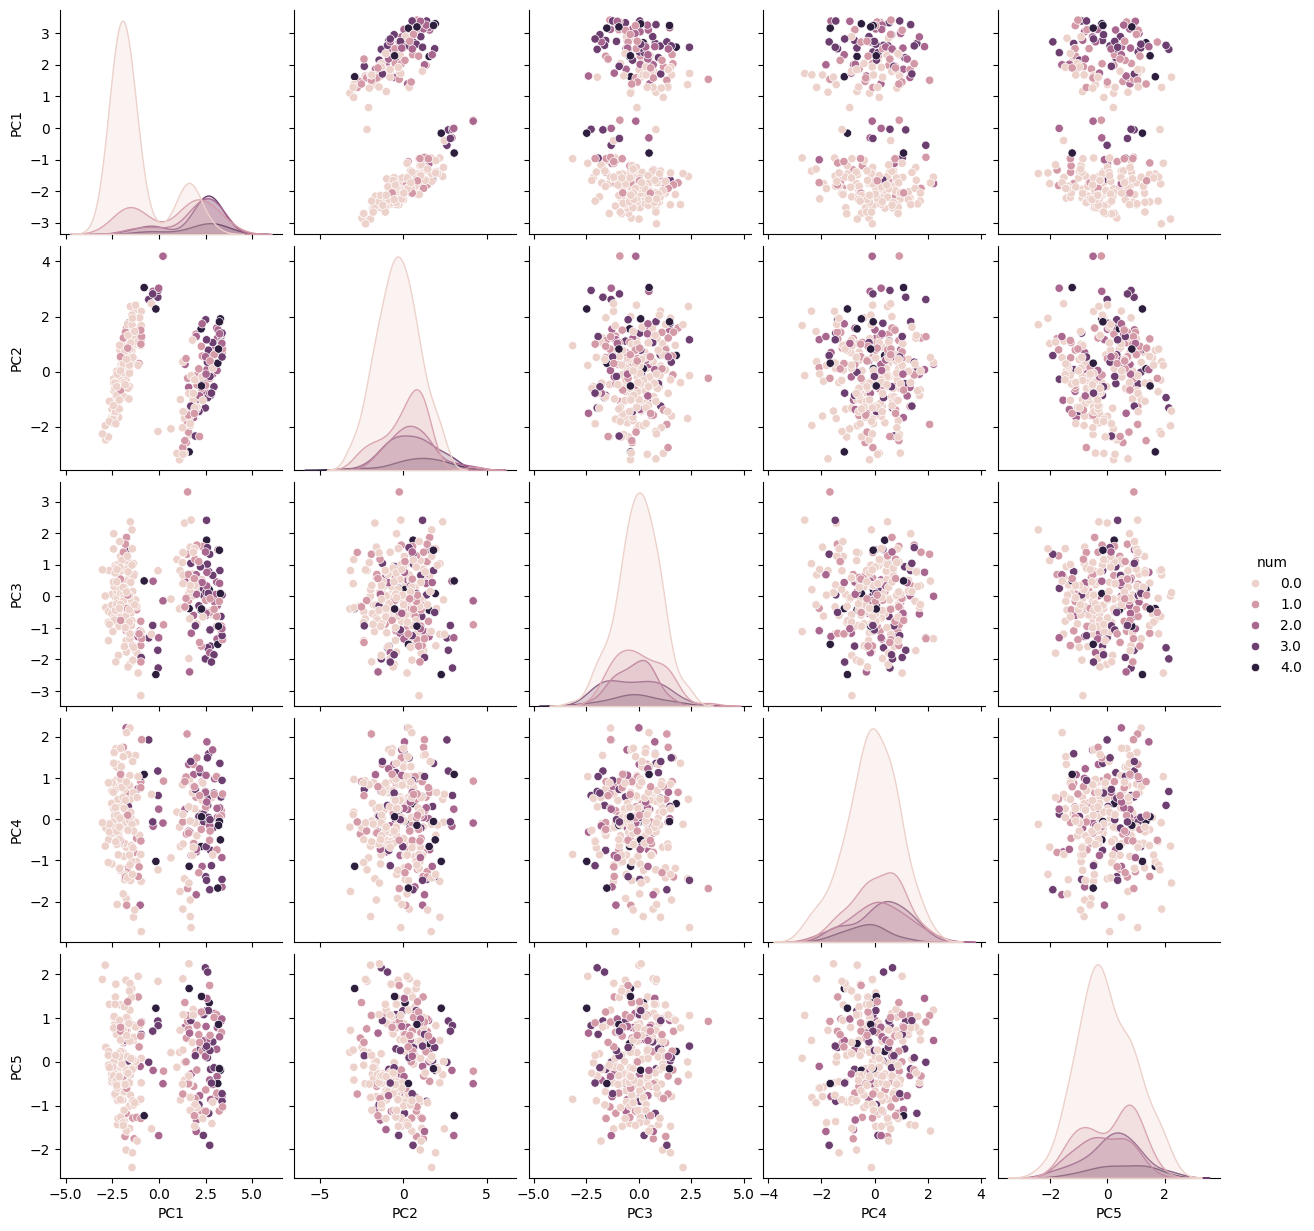

In [ ]:
# Perform PCA analysis, keeping the first 5 principal components
pca = PCA(n_components=5)

# Split the data into training and testing sets (80% training, 20% testing)
heart_train, heart_test = train_test_split(heart_df_scaled, test_size=0.2, random_state=42)


heart_train_df = pd.DataFrame(heart_train)
heart_train_x_df = heart_train_df.drop(columns=['num'])
heart_train_y_df = heart_train_df['num']

heart_test_df = pd.DataFrame(heart_test)
heart_test_x_df = heart_test_df.drop('num', axis=1)
heart_test_y_df = heart_test_df['num']

heart_train_x_pca = pca.fit_transform(heart_train_x_df)
heart_train_pca_df = pd.DataFrame(heart_train_x_pca, columns=pca_cols)

# Add the "num" column to the heart_v3_train_pca_df dataframe
heart_train_pca_df['num'] = heart_train_y_df.reset_index(drop=True)

heart_test_x_pca = pca.transform(heart_test_x_df)
heart_test_pca_df = pd.DataFrame(heart_test_x_pca, columns=pca_cols)
heart_test_pca_df['num'] = heart_test_y_df.reset_index(drop=True)

heart_pca_df = pd.concat([heart_train_pca_df, heart_test_pca_df], ignore_index=True);

# un-scale num for display purposes in a separate df
num_mean_original = scaler.mean_[-1]  # Last element of mean_ corresponds to 'num'
num_std_original = scaler.scale_[-1]   # Last element of scale_ corresponds to 'num'

heart_train_pca_unscaled_num_df = heart_train_pca_df.copy(deep=True)
heart_train_pca_unscaled_num_df['num'] = heart_train_pca_df['num'] * num_std_original + num_mean_original

heart_test_pca_unscaled_num_df = heart_test_pca_df.copy(deep=True)
heart_test_pca_unscaled_num_df['num'] = heart_test_pca_df['num'] * num_std_original + num_mean_original

heart_pca_unscaled_num_df = pd.concat([heart_train_pca_unscaled_num_df, heart_test_pca_unscaled_num_df], ignore_index=True);

#print(heart_train_pca_df.head(3))
#print(heart_train_pca_unscaled_num_df.head(3))
#print(heart_test_pca_df.head(3))
#print(heart_test_pca_unscaled_num_df.head(3))
#print(heart_pca_df.head(3))
#print(heart_pca_unscaled_num_df.head(3))

sns.pairplot(heart_pca_unscaled_num_df, hue='num')


> WOOHOO! We can already use PC1 vs the other PC-s (especially PC2) to somewhat distinguish the people who have no heart disease from people who do have some kind of heart disease. If we get some more success, I might consider a linear or logistic regression.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(heart_train_x_pca, heart_train_y_df)

# Make predictions on the test set
heart_test_y_pca_pred = lin_reg.predict(heart_test_x_pca) # Changed heart_test_y_df to heart_test_x_pca

# Evaluate the model
lin_reg_score = lin_reg.score(heart_test_x_pca, heart_test_y_df)  # Changed heart_train_x_pca to heart_test_x_pca for evaluating on test data
print("Linear Regression score:", lin_reg_score)

Linear Regression score: 0.4979221341589688


> A linear regression score of 0.4946 (n_components = 2) is not nearly good enough for me, nor is a linear regression score of 0.4948 (for n_components = 3), 0.4988 (n_components = 4, or 0.4979 (n_components = 5), so I will not do linear regression

In [ ]:
# doing K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score

# Create a K-means clustering model
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)

# Fit the model to the training data
kmeans.fit(heart_train_x_pca, heart_train_y_df)

# Make predictions on the test set
heart_test_y_kmeans_pred = kmeans.predict(heart_test_x_pca)

# Evaluate the model
kmeans_score = kmeans.score(heart_test_x_pca, heart_test_y_df)
print("K-Means Clustering score:", kmeans_score)

ari_score = adjusted_rand_score(heart_test_y_df, heart_test_y_kmeans_pred)
print("K-Means Clustering Adjusted Rand Index:", ari_score)

silhouette_avg = silhouette_score(heart_test_x_pca, heart_test_y_kmeans_pred)
print("Silhouette Score:", silhouette_avg)

K-Means Clustering score: -208.01949404804245
K-Means Clustering Adjusted Rand Index: 0.15613736772004438
Silhouette Score: 0.20747774315427034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


> Not very good results and the warning here because of the num being a continuous variable, so will wait until after using categories for each value of num to evaluate K-means

In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rfr.fit(heart_train_x_pca, heart_train_y_df)

# Make predictions on the test set
heart_test_y_rfr_pred = rfr.predict(heart_test_x_pca)

# Evaluate the model
rfr_score = rfr.score(heart_test_x_pca, heart_test_y_df)
print("Random Forest Regression score:", rfr_score)

Random Forest Regression score: 0.5282497653500196


In [ ]:
# Support Vector Regression
from sklearn.svm import SVR

# Create an SVR model
svr = SVR()

# Fit the model to the training data
svr.fit(heart_train_x_pca, heart_train_y_df)

# Make predictions on the test set
heart_test_y_svr_pred = svr.predict(heart_test_x_pca)

# Evaluate the model
svr_score = svr.score(heart_test_x_pca, heart_test_y_df)
print("Support Vector Regression score:", svr_score)

Support Vector Regression score: 0.3796973855018797


> Low random forest regression and support vector regression score as well. Due to various low regression scores when treating num as an integer, I will instead try with classifying num as num_0 through num_4

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# now trying with heart_df_v3 so I can use tests like ANOVA, chi-square, F-test

# will start by scaling numerical_cols_v3 first
scaler_2 = StandardScaler()
heart_df_v3_scaled = heart_df_v3.copy(deep=True);
# won't modify heart_df_v3 accidentally
scaled_data_2 = scaler.fit_transform(heart_df_v3_scaled[numerical_cols_v3]);

heart_df_v3_scaled[numerical_cols_v3] = pd.DataFrame(scaled_data_2, columns=numerical_cols_v3, index=heart_df_v3_scaled.index);
pca_2 = PCA(n_components=5)
heart_train_2, heart_test_2 = train_test_split(heart_df_v3_scaled, test_size=0.2, random_state=42)



heart_train_df_2 = pd.DataFrame(heart_train_2)
heart_train_x_df_2 = heart_train_df_2.drop(columns=categorical_num_cols)
heart_train_y_df_2 = heart_train_df_2[categorical_num_cols]

heart_test_df_2 = pd.DataFrame(heart_test_2)
heart_test_x_df_2 = heart_test_df_2.drop(categorical_num_cols, axis=1)
heart_test_y_df_2 = heart_test_df_2[categorical_num_cols]

heart_train_x_pca_2 = pca_2.fit_transform(heart_train_x_df_2)
heart_train_pca_df_2 = pd.DataFrame(heart_train_x_pca_2, columns=pca_cols)

# Add the "num" column to the heart_train_pca_df_2 dataframe
heart_train_pca_df_2[categorical_num_cols] = heart_train_y_df_2.reset_index(drop=True)

# will transform the test data using PCA for later use in testing accuracy of models on test data
heart_test_x_pca_2 = pca_2.transform(heart_test_x_df_2)
heart_test_pca_df_2 = pd.DataFrame(heart_test_x_pca_2, columns=pca_cols)
heart_test_pca_df_2[categorical_num_cols] = heart_test_y_df_2.reset_index(drop=True)

# will also have the combined training / test data for later use
heart_pca_df_2 = pd.concat([heart_train_pca_df_2, heart_test_pca_df_2], ignore_index=True);

# print(heart_train_pca_df_2.head(3));
# print(heart_test_pca_df_2.head(3));
# print(heart_pca_df_2.head(3));

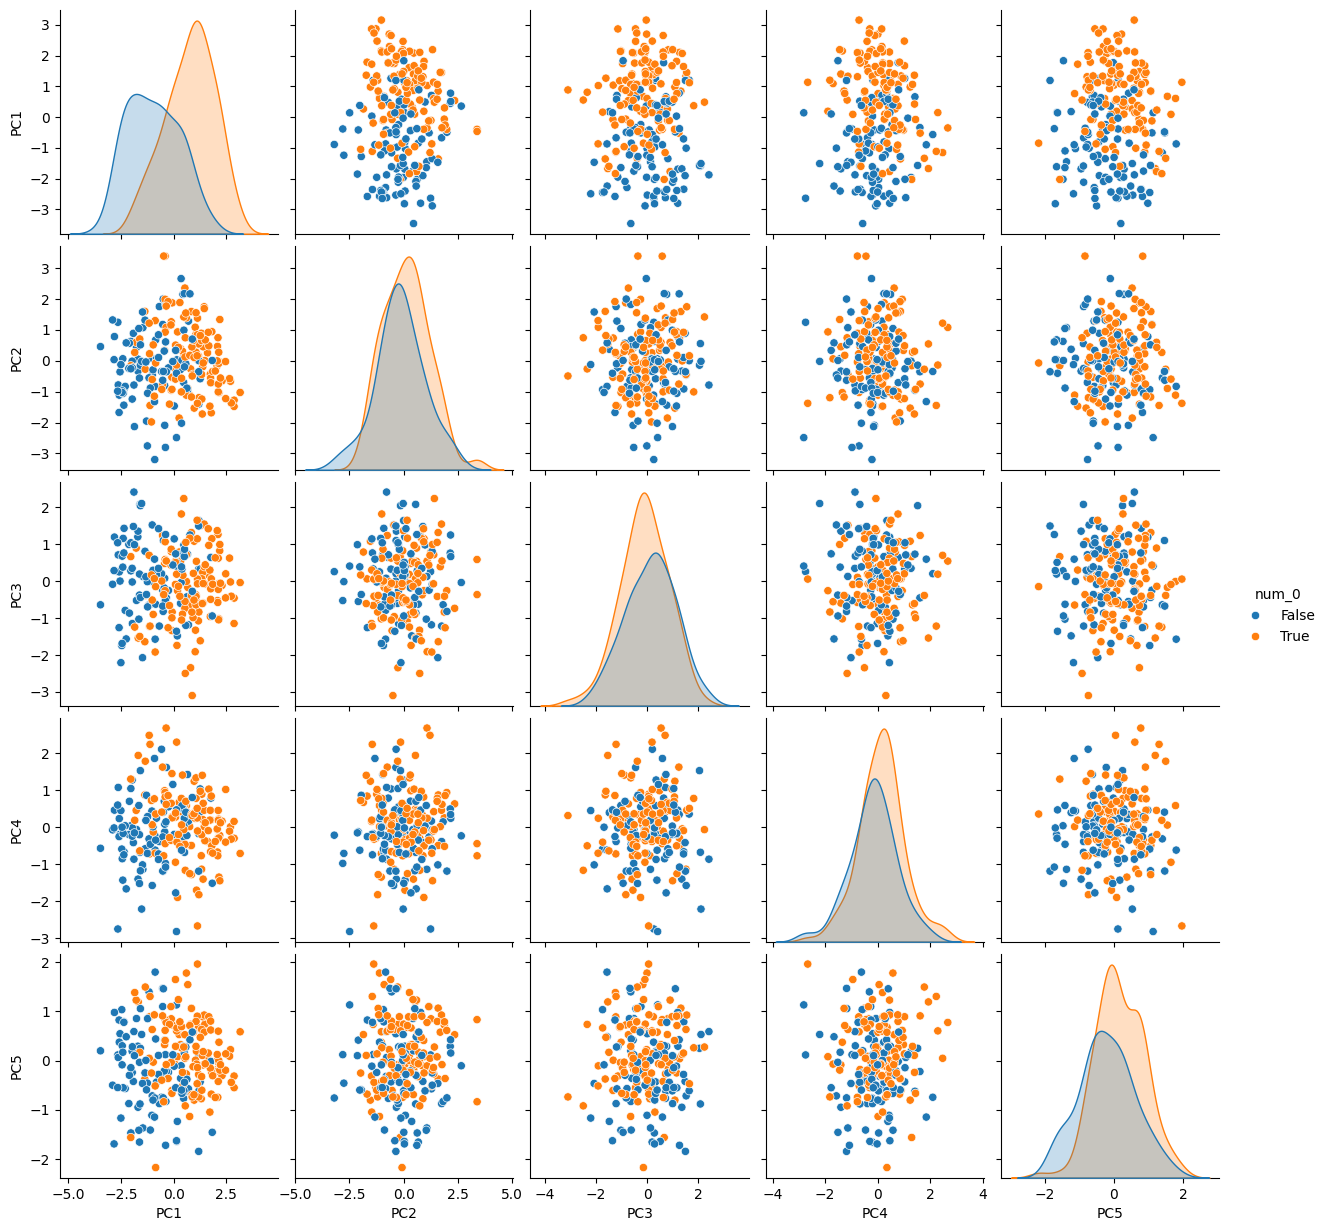

In [ ]:
sns.pairplot(heart_train_pca_df_2, x_vars = pca_cols, y_vars = pca_cols, hue='num_0')

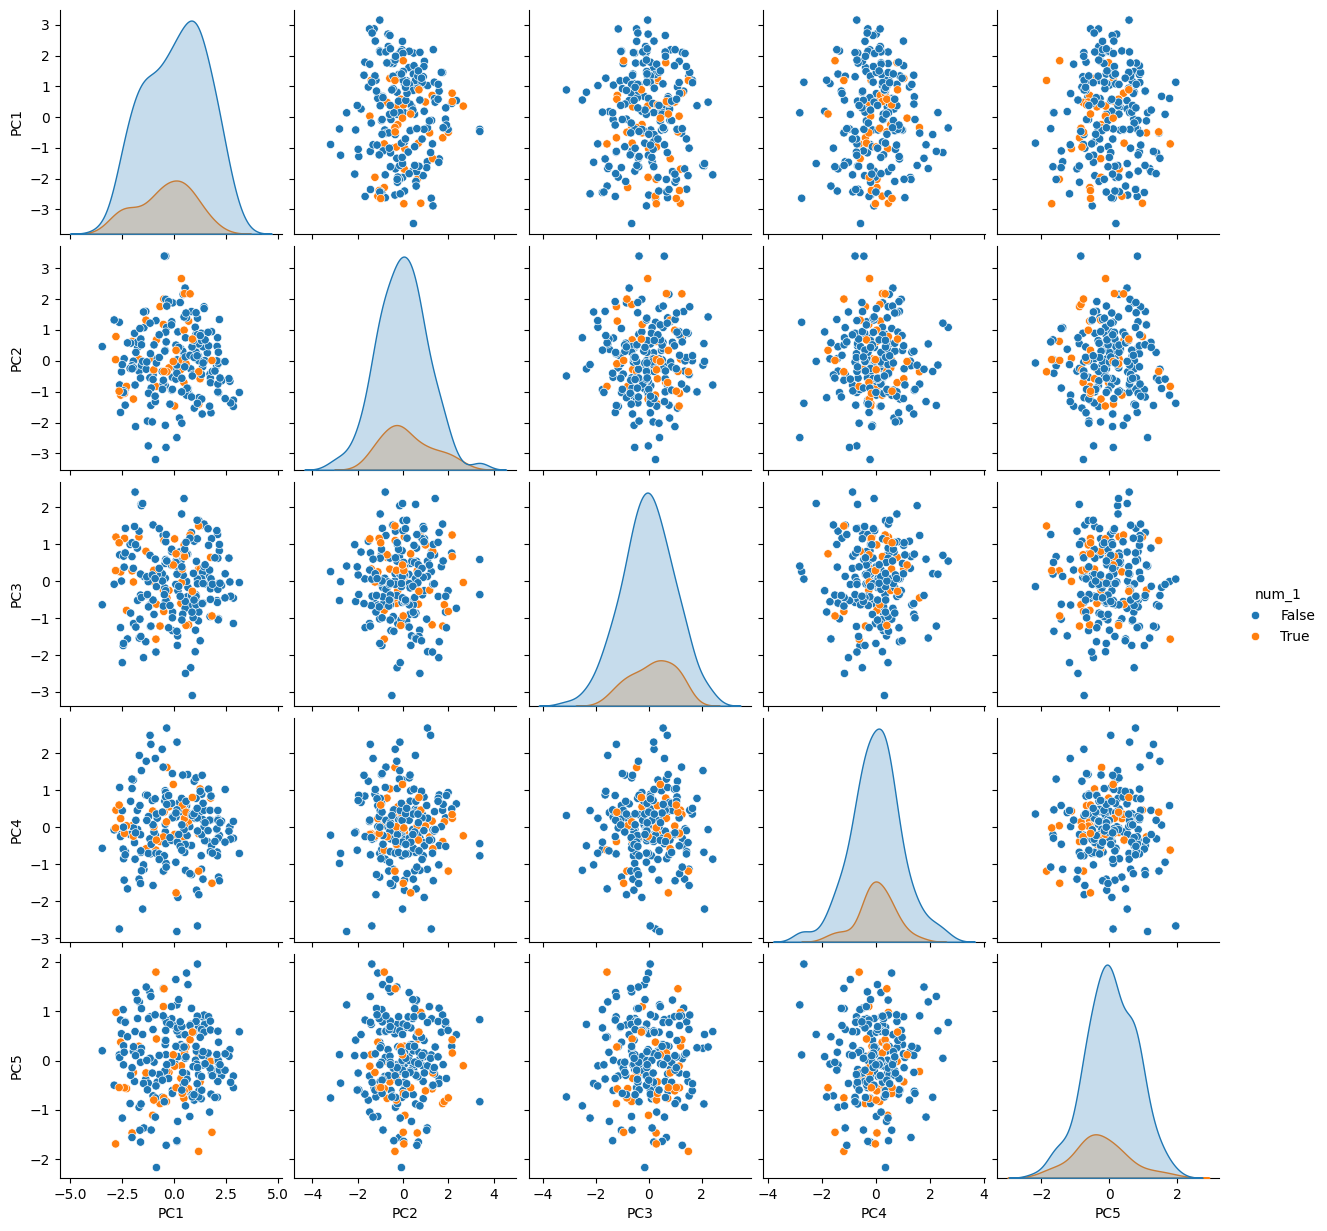

In [ ]:
sns.pairplot(heart_train_pca_df_2, x_vars = pca_cols, y_vars = pca_cols, hue='num_1')

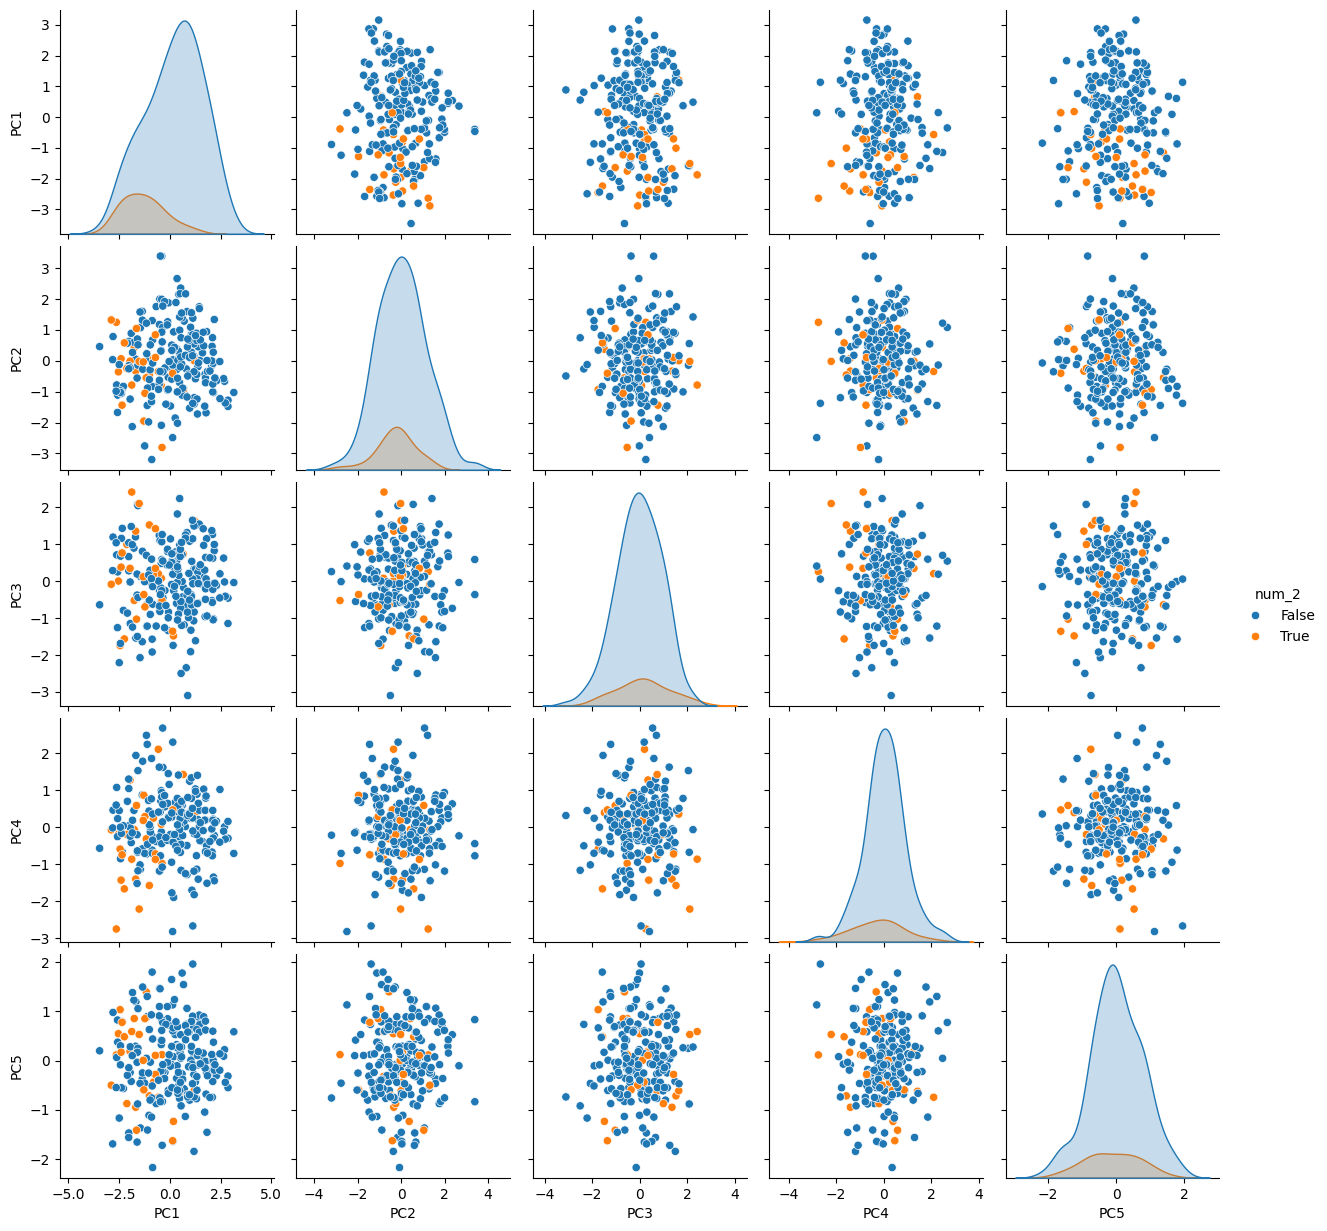

In [ ]:
sns.pairplot(heart_train_pca_df_2, x_vars = pca_cols, y_vars = pca_cols, hue='num_2')

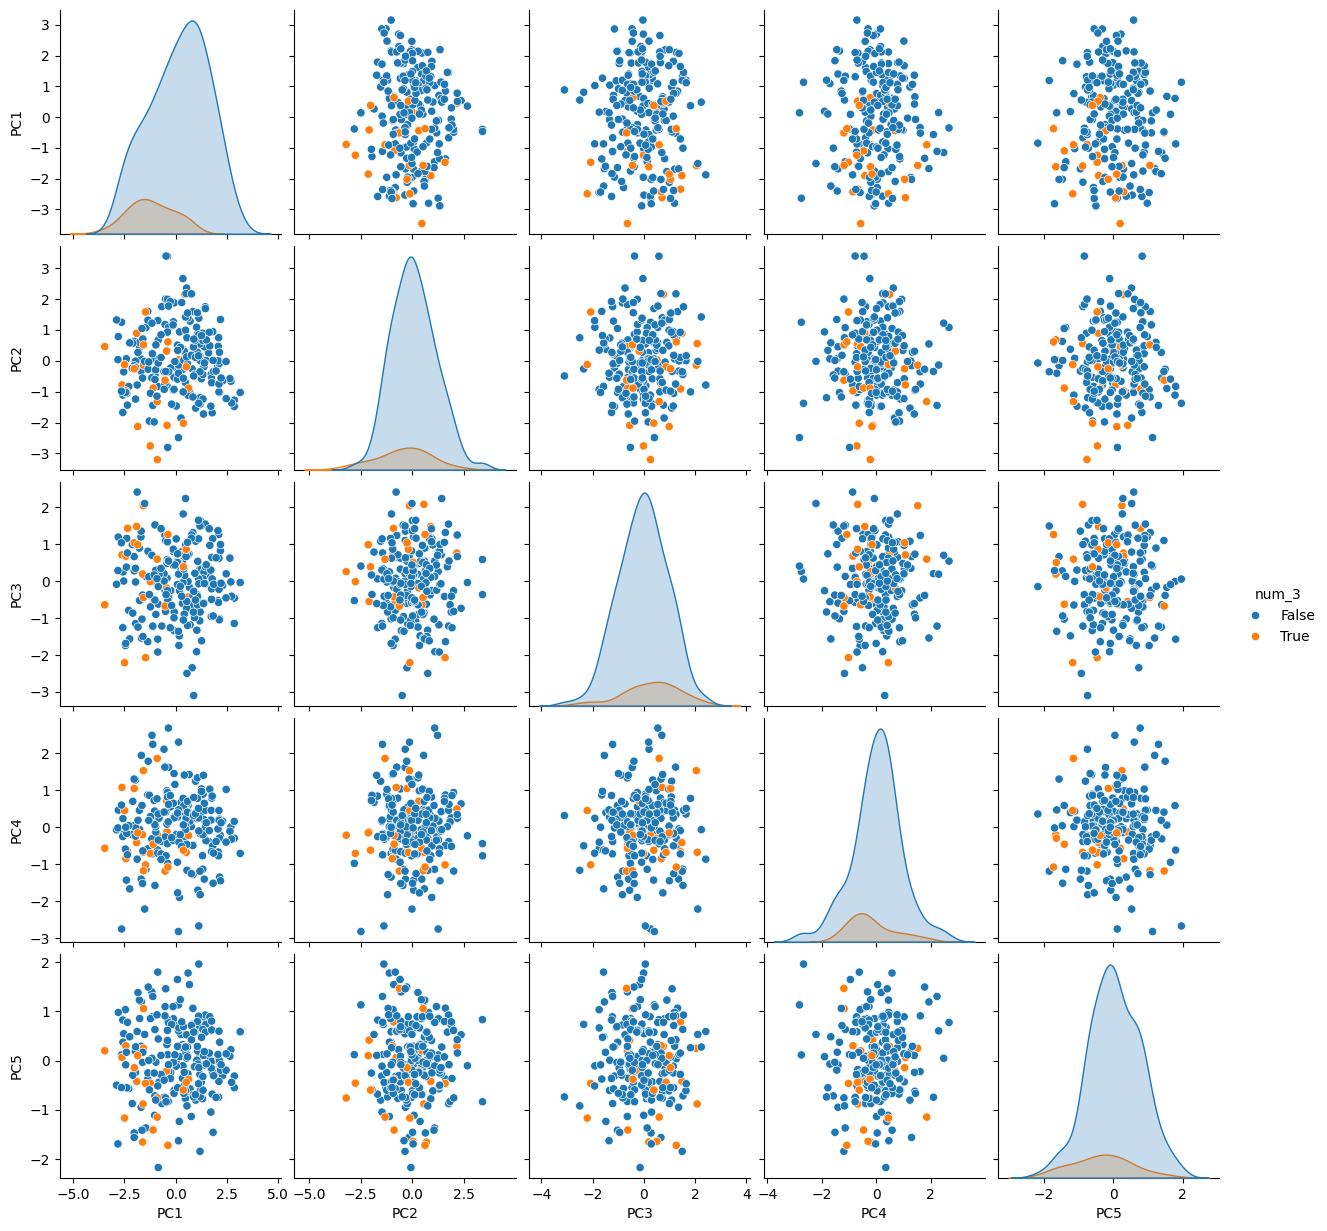

In [ ]:
sns.pairplot(heart_train_pca_df_2, x_vars = pca_cols, y_vars = pca_cols, hue='num_3')

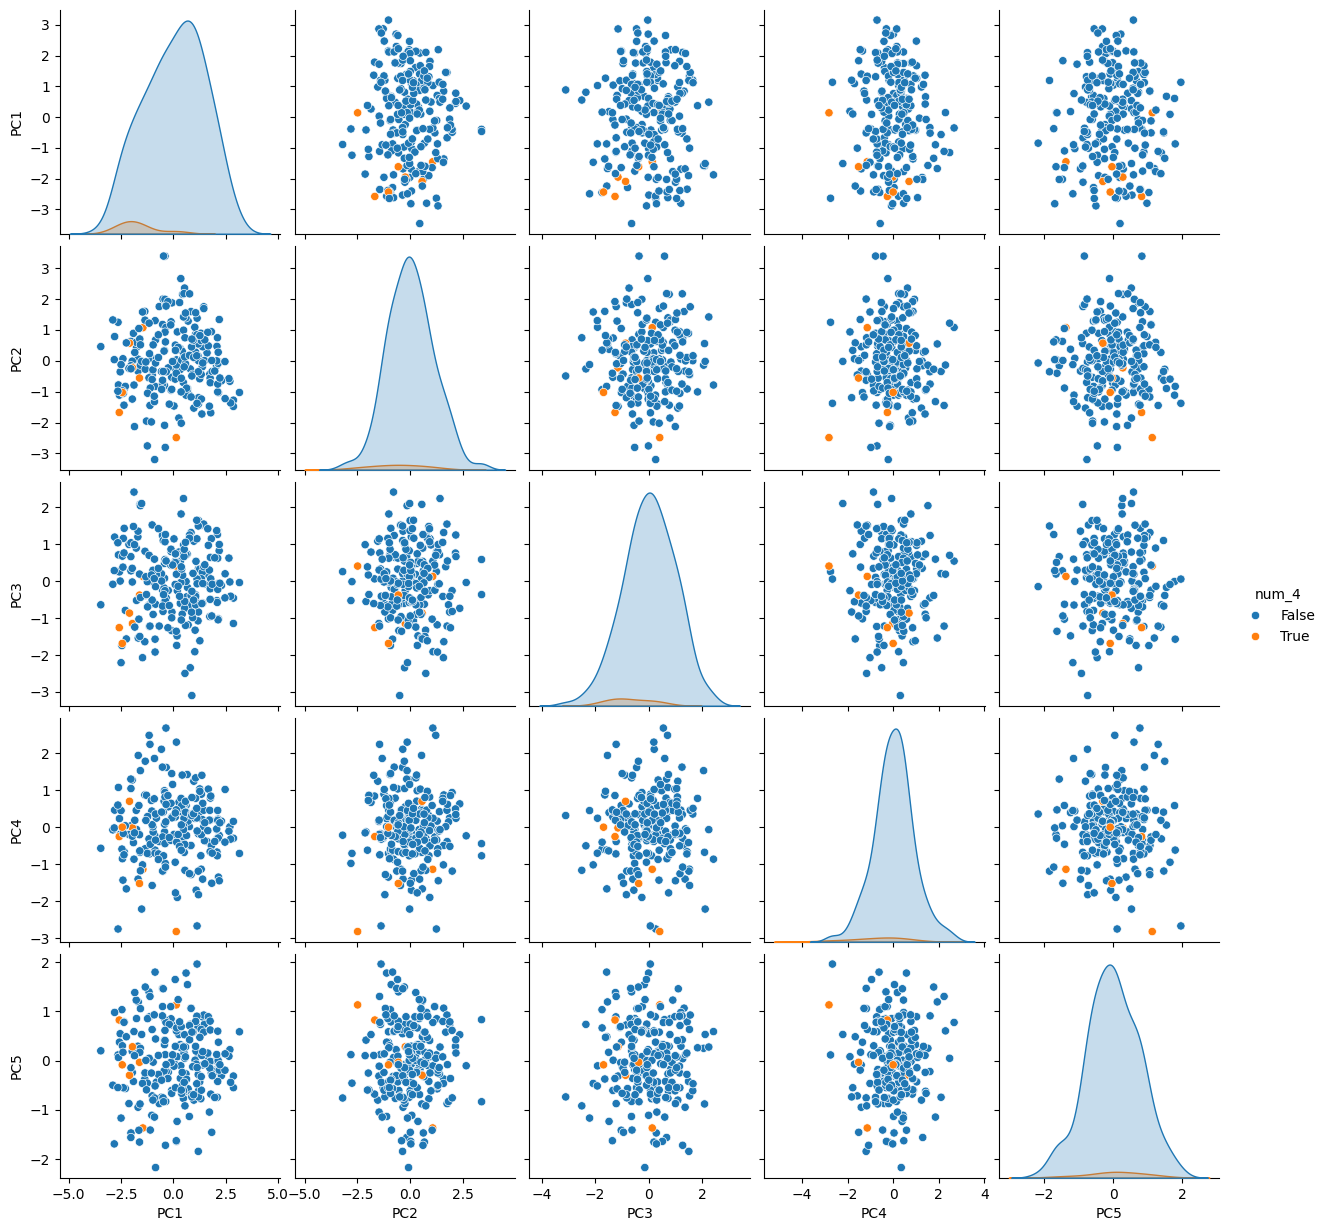

In [ ]:
sns.pairplot(heart_train_pca_df_2, x_vars = pca_cols, y_vars = pca_cols, hue='num_4')

> I note that PC1 is generallly significantly and PC5 is generally slightly higher for num==0 than other num values

In [ ]:
# doing K-means clustering on the categories num_0 through num_4 to see if
# making num_0 through num_4 as classes after doing PCA to see if that improves
# K-means clustering. I also noted that clustering seemed maybe decent in the pairplots
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)

# Fit the model to the training data
kmeans.fit(heart_train_x_pca_2, heart_train_y_df_2)

# Make predictions on the test set
heart_test_y_kmeans_pred_2 = kmeans.predict(heart_test_x_pca)

# Evaluate the model
kmeans_score_2 = kmeans.score(heart_test_x_pca, heart_test_y_df_2)
print("K-Means Clustering score:", kmeans_score_2)

for col in categorical_num_cols:
  ari_score_2 = adjusted_rand_score(heart_test_y_df_2[col], heart_test_y_kmeans_pred_2)
  print(f"K-Means Clustering Adjusted Rand Index for {col}:", ari_score_2)

silhouette_avg_2 = silhouette_score(heart_test_x_pca, heart_test_y_kmeans_pred_2)
print("Silhouette Score after with num separated into classes:", silhouette_avg_2)

K-Means Clustering score: -271.3985587319115
K-Means Clustering Adjusted Rand Index for num_0: 0.2008486160154915
K-Means Clustering Adjusted Rand Index for num_1: -0.009472817133443162
K-Means Clustering Adjusted Rand Index for num_2: 0.021713708421846566
K-Means Clustering Adjusted Rand Index for num_3: -0.0038055357104963467
K-Means Clustering Adjusted Rand Index for num_4: -0.002214272369340631
Silhouette Score after with num separated into classes: 0.18704930340848183


> Ok so K-means clustering is still not very good for this dataset even after PCA and separating num values into individual categories

In [ ]:
# will get cross_val_score and f1_score for each collumn in categorical_num_cols

from sklearn.metrics import f1_score  # Import the f1_score function
classifiers = {
    'K-NN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'SVC': SVC()
}
for col in categorical_num_cols:
  for name, clf in classifiers.items():
    scores = cross_val_score(clf, heart_train_x_pca_2, heart_train_df_2[col], scoring='accuracy', cv=10)
    print(f'{name} Classifier with PCA features - Average cross-val accuracy score for {col} on training set: {scores.mean():.4f}')
    clf.fit(heart_train_x_pca_2, heart_train_df_2[col])
    f1_score_value_pca = f1_score(clf.predict(heart_train_x_pca_2), heart_train_df_2[col]) # Calculate f1_score using predictions
    print(f'{name} Classifier with PCA features - F1 Score for {col} on training set: {f1_score_value_pca}')
    print('\n')
  print('\n\n')

# Note that heart_train_x_pca_2 is just heart_train_pca_2[pca_cols], but I am using this to
# reduce warnings to improve readability of the results



K-NN Classifier with PCA features - Average cross-val accuracy score for num_0 on training set: 0.7755
K-NN Classifier with PCA features - F1 Score for num_0 on training set: 0.8605577689243028


MLP Classifier with PCA features - Average cross-val accuracy score for num_0 on training set: 0.7891
MLP Classifier with PCA features - F1 Score for num_0 on training set: 0.8627450980392157


SVC Classifier with PCA features - Average cross-val accuracy score for num_0 on training set: 0.7931
SVC Classifier with PCA features - F1 Score for num_0 on training set: 0.8659003831417624





K-NN Classifier with PCA features - Average cross-val accuracy score for num_1 on training set: 0.7842
K-NN Classifier with PCA features - F1 Score for num_1 on training set: 0.27450980392156865


MLP Classifier with PCA features - Average cross-val accuracy score for num_1 on training set: 0.8237
MLP Classifier with PCA features - F1 Score for num_1 on training set: 0.4


SVC Classifier with PCA features - Av

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


K-NN Classifier with PCA features - Average cross-val accuracy score for num_4 on training set: 0.9607
K-NN Classifier with PCA features - F1 Score for num_4 on training set: 0.4


MLP Classifier with PCA features - Average cross-val accuracy score for num_4 on training set: 0.9652
MLP Classifier with PCA features - F1 Score for num_4 on training set: 0.7272727272727273


SVC Classifier with PCA features - Average cross-val accuracy score for num_4 on training set: 0.9696
SVC Classifier with PCA features - F1 Score for num_4 on training set: 0.0







/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


> First off, because col='num_4' gives me a warning of not converging after the max number of iterations, I will ignore the scores for col='num4'

> The F scores are low for num_1 through num_4 but this is probably due to the limited number of samples available that were classified as num_1 through num_4. The F-scores for each classifier for num_0 were around 0.8 which is good enough for me for num_0, and this is probably because num_0 had many samples available.

> Overall, I am satisfied with PCA since a cross-val of around 0.8 and even plenty closer to 0.85 or 0.9 is realistically very good, but now I will try bagging and boosting.

> The F-scores generally increased as n_components increased, but was significantly higher for n_components = 5 than for the rest of the n_components values 2 through 4

> cross-val accuracy scores stayed mostly the same for num_2 but K-NN cross-val at num_2 was somwhat lower at n_components = 2

In [ ]:
categorical_num_cols_excl_4 = ['num_0', 'num_1', 'num_2', 'num_3']
# represents the categorical columns corresponding to encoding num excluding num_4

In [ ]:
from sklearn.ensemble import BaggingClassifier

knn = KNeighborsClassifier()
svc = SVC()
dt = DecisionTreeClassifier()

bag_knn = BaggingClassifier(knn, n_estimators=50)
bag_svc = BaggingClassifier(svc, n_estimators=50)
bag_dt = BaggingClassifier(dt, n_estimators=50)

for col in categorical_num_cols_excl_4:
  print(f"Bagged KNN accuracy for {col}: {cross_val_score(bag_knn, heart_train_x_pca_2, heart_train_y_df_2[col], cv=5).mean()}")
  print(f"Bagged KNN F1 score for {col}: {f1_score(bag_knn.fit(heart_train_x_pca_2, heart_train_y_df_2[col]).predict(heart_test_x_pca_2), heart_test_y_df_2[col])}")

  print(f"Bagged SVC accuracy for {col}: {cross_val_score(bag_svc, heart_train_x_pca_2, heart_train_y_df_2[col], cv=5).mean()}")
  print(f"Bagged SVC F1 score for {col}: {f1_score(bag_svc.fit(heart_train_x_pca_2, heart_train_y_df_2[col]).predict(heart_test_x_pca_2), heart_test_y_df_2[col])}")

  print(f"Bagged DT accuracy for {col}: {cross_val_score(bag_dt, heart_train_x_pca_2, heart_train_y_df_2[col], cv=5).mean()}")
  print(f"Bagged DT F1 score for {col}: {f1_score(bag_dt.fit(heart_train_x_pca_2, heart_train_y_df_2[col]).predict(heart_test_x_pca_2), heart_test_y_df_2[col])}")
  print('\n')

Bagged KNN accuracy for num_0: 0.7621256038647344
Bagged KNN F1 score for num_0: 0.8125
Bagged SVC accuracy for num_0: 0.8017391304347827
Bagged SVC F1 score for num_0: 0.8387096774193549
Bagged DT accuracy for num_0: 0.7578743961352657
Bagged DT F1 score for num_0: 0.819672131147541


Bagged KNN accuracy for num_1: 0.797487922705314
Bagged KNN F1 score for num_1: 0.2222222222222222
Bagged SVC accuracy for num_1: 0.8237681159420289
Bagged SVC F1 score for num_1: 0.0
Bagged DT accuracy for num_1: 0.8019323671497585
Bagged DT F1 score for num_1: 0.0


Bagged KNN accuracy for num_2: 0.8677294685990338
Bagged KNN F1 score for num_2: 0.3333333333333333
Bagged SVC accuracy for num_2: 0.8722705314009662
Bagged SVC F1 score for num_2: 0.0
Bagged DT accuracy for num_2: 0.8589371980676329
Bagged DT F1 score for num_2: 0.3333333333333333


Bagged KNN accuracy for num_3: 0.8766183574879227
Bagged KNN F1 score for num_3: 0.0
Bagged SVC accuracy for num_3: 0.8855072463768116
Bagged SVC F1 score for 

> Again, I am ignoring the num_4 column, but this seems to be not much if any of an improvement from the PCA classifier itself, so I will not be using bagging. Also, the DT classifier with bagging does not really do well.

Now I will try a GradientBoostingClassifier and a StackingClassifier

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
for col in categorical_num_cols_excl_4:
  print(f"GB average accuracy for {col}: {cross_val_score(gb, heart_train_x_pca_2, heart_train_y_df_2[col], cv=5).mean()}")

GB average accuracy for num_0: 0.8061835748792271
GB average accuracy for num_1: 0.806280193236715
GB average accuracy for num_2: 0.8369082125603866
GB average accuracy for num_3: 0.8633816425120774


In [ ]:
# Stacking Classifier
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(estimators=[('knn', knn), ('svc', svc), ('gb', gb)], final_estimator=dt)
for col in categorical_num_cols_excl_4:
  print(f"Stack average accuracy for {col}: {cross_val_score(stack, heart_train_x_pca_2, heart_train_y_df_2[col], cv=5).mean()}")


Stack average accuracy for num_0: 0.7176811594202899
Stack average accuracy for num_1: 0.6343961352657004
Stack average accuracy for num_2: 0.8197101449275361
Stack average accuracy for num_3: 0.7707246376811594


> We see that Gradient Boosting slightly worsens the classification strength for each column except for a somewhat noticeable improvement in num_0, but this improvement is not enough for me to accept the significantly decreased accuracies in num_1 through num_3

> The Stacking classifier significantly downgrades accuracies for all of num==0 through num==3

## Summary of steps taken in model selection

> To summarize, I used various classification models from the labs in this class and tested their accuracy. I found it difficult to test accuracy on heart_df (as not encoded into columns num_0 through num_4) even after using PCA, due to num essentially behaving as a categorical variables, and the accuracy metrics of various models were not very good on the PCA-transformed heart_df. I also tried PCA with different numbers of components, and I chose 5 due to its significant accuracy improvement from 2 to 4

> Then, I applied PCA on heart_df_v3 (where heart_df_v3 separated various categorical-behaving variables (no pun intended) and most importantly num into classes whereas heart_df did not) and applied PCA on it, and noticed that several models produced pretty good results.

> While PCA on heart_df_3 with K-NN and SVC classifiers were good, PCA with MLP landed on top by just a little but somewhat noticeable margin, so I will choose that as my model.

# Conclusion

## Key Findings

> Based on my EDA, K-means clustering is terrible at least for this dataset and thus it could very well be terrible even with more advanced datasets. I also wouldn't have as much faith in other clustering methods, since it seems from the poor performance of K-means clustering that samples with similar features can easily have very different conditions, though I'd have to test this to be sure.

> With this dataset, K-NN, MLP, and SVC had similar performances on the PCA dataset, so it could be a good idea to consider each of these classifiers if training on a larger dataset

>> With the diversity of features in this dataset (as well as the potential features pertaining to heart disease in general), I feel that it would be too difficult to make an accurate model out of using all the features (due to the curse of dimensionality), so it is very important in any model trained in heart disease to have some kind of dimensionality-reduction method, such as PCA.

> This dataset would, at least in my strong opinion, need a lot more samples pertaining to the conditions already in the dataset to potentially be able to result in a strong enough model for actual use in industry. Especially for the condition corresponding to num=4, the high accuracy metrics I got are probably very misleading due to the very few samples with num=4.

## Problem Resolution

> While the accuracy for each type of mentioned heart disease is definitely a significant step in the right direction, I feel the cross_val_scores should be higher for this model to be used in the real-world.

> I feel that the low number of samples and representation of various heart conditions in the UCIML repository I used were severe limitations for this model. As such, I hope that a PCA model like the one that I used can produce much higher accuracy when using real-world datasets with a much greater number and diversity of samples, including ones that may not be publicly accessible due to patient privacy reasons.

> I also wanted to reiterate in this section that I do not think this classifier is trained enough to classify the heart condition corresponding to num==4 due to the very low number of samples we had for that num value. A new thing I wanted to say is that with the very low F-scores corresponding to num_1 through num_3 in the classifier tests, I think this model needs a significant amount of extra data corresponding to num==1 through num==4 before we can trust the cross_val scores we get from any classifiers for these num values.

## Deployment

> New inference and retraining would not need to happen very often unless there were sudden discoveries (such as if there are related but different conditions or new predictor variables that come into the limelight) pertaining to heart conditions this classifier was trained on or an explosion of cases of these conditions. It could also happen on a regular but maybe months-long or years-long interval as more data becomes available from more patients naturally experiencing these conditions.

> Humans would indeed review the results and make decisions on their own based on how likely each condition is. For example, some people might not think an 80% likelihood of having a specified condition is enough for them to focus all their treatment efforts on that condition, and maybe some people even with 90 or 95% accuracy would still want to be prepared in case there is a misdiagnosis from this classifier. Again, the purpose of this model was mainly to alert patients to the possibility of them having some of these conditions rather than to diagnose them. Also, this model was trained on a severly limited dataset with regards to the feature set and included heart conditions, so I would in no way trust this to make proper classifications either.

## Improvements

> The only real clustering I tried with this model was K-means but if I had more time, I might try other kinds of clustering such as Agglomerative clustering.

> I did not use cross validation to evaluate the accuracy of the model, and I could have definitely done so (in order to assess the model's performance on new data) if I had more time.

> I could have done a chi-square or similar test to determine if the differences in the frequencies of each heart condition in this dataset had any statistical significance at all. In fact, I had plans to do that but forgot, and I could definitely do that if I had more time. I also could have done it early in my exploratory data analysis to determine how good any potential model could be based on this dataset.

> Because the dataset I used was very limited in its scope, I could try finding and using another larger dataset.

> There also could have been more features than the ones in my used dataset that could have maybe made an impact, such as neurological features or conditions in other parts of the body (such as emotional features like happiness or depression or non-heart conditions such as arthritis or physical or even mental disabilities).

> In a dataset with more columns, I might even try doing PCA with a different number of components (for example, if I have 50 columns, I might do 6 to 7 components or maybe up to 10).